<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# Human Activity Recognition


## Summary

The data we will study all along this notebook are public data, which were acquired and described by [Anguita et al. (2013)](). They are available on the [bucket](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) of Irvine California University. They represent usecases of Human Activity Recognition from signal recordings (gyroscope, accelerometer) obtained with a smartphone. The data are analyzed to illustrate the main common steps in data science applicable to sampled physical signals. Visualization of raw signals to evaluate the difficulties posed by this type of data; exploration ([principal component analysis](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [discriminant factor analysis](http://wikistat.fr/pdf/st-m-explo-acp.pdf)) of the transformed data (*features*) calculated from the signals; prediction of activity from the features data by most linear methods including: [logistic regression](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), linear and nonlinear [SVM](http://wikistat.fr/pdf/st-m-app-svm.pdf),  prediction of the activity from the raw signals by elementary [neural network](http://wikistat.fr/pdf/st-m-app-rn.pdf) and  [convolutional networks](http://wikistat.fr/pdf/st-m-app-rn.pdf) (deep learning). This notebook shows the very good (96%) prediction of elementary linear methods on the features  data and, to save cost (for the embedded battery) transformations, similar accuracies are obtained by a convolutional network on the raw signals.



## Introduction

### Objectives 

The objective is to recognize the activity of an individual from a set of signals recorded on a smartphone from the embedded gyroscope and accelerometer. A learning database has been built experimentally. A set of persons  performed a determined activity for a predefined period of time while signals were recorded. The data come from the community that aims to recognize human activities (Human activity recognition, HAR). See the [paper](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) on a symposium in 2013. The analysis of data associated with real-time activity identification is not discussed.

The available public data was acquired, described and partly analyzed by [Anguita et al. (2013)](https://www.icephd.org/sites/default/files/IWAAL2012.pdf). They are available on the University California Irvine (UCI) [repository](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dedicated to machine learning.

The archive contains the raw data: accelerations sampled at 64 htz during 2s. The accelerations in x, y, and z (body_acc), each contains 128 columns, those by subtracting the natural gravity (total_acc) as well as the angular accelerations in x, y, and z obtained from the gyroscope (body_gyro). The choice of a power of 2 for the sampling frequency allows the efficient execution of Fourier transform or wavelet transform algorithms.


The *features data* have been built from the *a priori* knowledge on the behaviour of the different activities we want to study. We will see that it is easy to achieve high performances for the classification problem using these features data. 


The objective of this TP is to try to achieve the same performances directly from the original data (the raw signals) using different tools : 

* Signal decomposition in different basis (Wavelet, Fourier)
* Convolutional Neural Networks


### The data set 

Each registration is labeled with ** 6 activities **: standing, sitting, lying, walking, walking upstairs or walking downstairs. Each dataset (the raw data and the features data) is splitted into a learning sample and a test sample. The test sample is only used to evaluate and compare the predictive qualities of the main methods.  This is a problem of * supervised classification * (6 classes) with $7352$  samples for learning and  $2947$ for testing.


The dataset has been donwloaded and is available on this github repository at the following path : `data/HumanActivityRecognition/` and follow this organisation :

```
train
└───Inertial Signals/
|   |   body_acc_x_train.txt
|   |   body_acc_y_train.txt
|   |   body_acc_z_train.txt
|   |   body_gyro_x_train.txt
|   |   body_gyro_y_train.txt
|   |   body_gyro_z_train.txt
|   |   total_acc_x_train.txt
|   |   total_acc_y_train.txt
|   |   total_acc_z_train.txt
|   X_train.txt
|   y_train.txt
test
└───Inertial Signals/
|   |   body_acc_x_test.txt
|   |   body_acc_y_test.txt
|   |   body_acc_z_test.txt
|   |   body_gyro_x_test.txt
|   |   body_gyro_y_test.txt
|   |   body_gyro_z_test.txt
|   |   total_acc_x_test.txt
|   |   total_acc_y_test.txt
|   |   total_acc_z_test.txt
|   X_test.txt
|   y_test.txt
features.txt
```

The `train` and `test` datasets are composed respectively of $10299$ and $2947$ individuals. In each folder you will find :

* The `Inertial Signal` folder that contains the original data for each individual :
    * Triaxial acceleration from the accelerometer (total acceleration) in x, y and z,
    * The estimated body acceleration in x, y and z,
    * Triaxial Angular velocity from the gyroscope in x, y and z.
    
    
    
* The `X_*.txt` files that contains a 561 features vector for each individual among the following variable

Name|Signification
-|-
mean | Mean value
std | Standard deviation
mad | Median absolute value
max | Largest values in array
min | Smallest value in array
sma | Signal magnitude area
energy | Average sum of the squares
iqr | Interquartile range
entropy | Signal Entropy
arCoeff | Autorregresion coefficients
correlation | Correlation coefficient
maxFreqInd | Largest frequency component
meanFreq | Frequency signal weighted average
skewness | Frequency signal Skewness
kurtosis | Frequency signal Kurtosis
energyBand | Energy of a frequency interval
angle | Angle between two vectors

* The `y_*.txt` files that contains the true activity label among the 6 possibilities :
    * WALKING,
    * WALKING UPSTAIRS,
    * WALKING DOWNSTAIRS,
    * SITTING,
    * STANDING,
    * LAYING


### Workflow 

A first visualization and exploration of the raw signals shows that they are difficult to analyze; the activity classes are indeed poorly characterized. The main reason is the lack of synchronization of the beginning of the activity; the phase shift of the signals then appears as a noise or artefact very detrimental to the good discrimination of the activities on the basis of the usual Euclidean distance. This is the reason why, [Anguita et al. (2013)](https://www.icephd.org/sites/default/files/IWAAL2012.pdf) propose to compute a set of transformations or characteristics (*features*) of the signals: variance, correlations, entropy, Fourier decomposition ... These are then $ p = 561 $ variables that are considered and explored in Section 3. The [principal component analysis](http://wikistat.fr/pdf/st-m-explo-acp. pdf) and especially the [discriminant factorial analysis](http://wikistat.fr/pdf/st-m-explo-acp.pdf) show the good discriminating qualities of these features data obtained from an expert's knowledge on signal processing. Section 4 exploits these features variables and shows that elementary statistical models, such as linear models (logistic regression, discriminant analysis) or a traditional support vector machine (SVM) algorithm using a simple linear kernel, lead to excellent forecasts, which is not the case for sophisticated nonlinear algorithms (*random forest, gradient boosting*).

However, having sophisticated transformations (such as Fourier transform) continuously calculated is not a viable solution for the battery of a connected embedded object. The candidate algorithm should  be able to produce an integrated solution  in a cicuit, as it is the case for chips dedicated to facial recognition. This is the purpose of section 5: to demonstrate the feasibility of a solution based only on raw signals; solution implementing a neural network integrating  [convolutional layers](http://wikistat.fr/pdf/st-m-app-rn.pdf).

###  Software Environment
To be executed, this notebook (*jupyter notebook*) requires the installation of Python3 via for example the site [Anaconda](https://conda.io/docs/user-guide/install/download.html). The statistical exploration and learning algorithms used are available in the [`Scikit-learn` library](http://scikit-learn.org/stable/) while a basic approach to deep network learning of neurons with convolutional layer requires the installation of the library [`Keras`](https://keras.io/) which drives that of [`TensorFlow`](https://www.tensorflow.org/).

**Notes:**
- this notebook was built and tested on Ubuntu Mate 16.04 (Python 3.6) but its use on Windows or Mac OS is  not be a problem once the environment is properly installed.
- the `conda` command installs the` Keras` environment without difficulty, including `TensorFlow`;
the neural networks considered remain of simple structure, a GPU card is not essential for their learning unless the user wishes to improve the optimizations and choice of the architecture.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import collections

# Custom function that will allow to load data
import utils.load as ul
# Custom function that will allow to display some results
import utils.illustration as uil

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("whitegrid")


import sklearn.decomposition as sdec
import  sklearn.preprocessing as sprep
import sklearn.discriminant_analysis as sda

import pywt
from pywt import wavedec

Some static data that will be used all along this TP

In [2]:
CMAP = plt.get_cmap("Set1")
ACTIVITY_DIC = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}
COLOR_DIC = {v:CMAP(k-2) if v!="WALKING" else CMAP(11) for k,v in ACTIVITY_DIC.items()}
SIGNALS = [ "body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z"]
LABELS = [ACTIVITY_DIC[c] for c in range(1,7)]
COLOR_LIST = [COLOR_DIC[l] for l in LABELS]
DATA_PATH = "../data/HumanActivityRecognition/"


##  The features data

The data set contains two `train` and` test` files of the 561 characteristics (*features*) variables computed in the time and frequency domains by transformation of the raw signals.
We will first have a look at these features data. We first read and vizualize the data. 




In [3]:
XTrainFeatures=ul.my_read_csv(DATA_PATH+"train/X_train.txt")
XTestFeatures=ul.my_read_csv(DATA_PATH+"test/X_test.txt")
ytrain=ul.my_read_csv(DATA_PATH+"train/y_train.txt")[0]
ytrain_label = [ACTIVITY_DIC[y] for y in ytrain]
ytest=ul.my_read_csv(DATA_PATH+"test/y_test.txt")[0]
ytest_label = [ACTIVITY_DIC[y] for y in ytest]
print("X Train data dimensions %d X %d" %(XTrainFeatures.shape))
print("X Test data dimensions %d X %d" %(XTestFeatures.shape))

X Train data dimensions 7352 X 561
X Test data dimensions 2947 X 561


In [4]:
XTrainFeatures.head()

0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0.030400 -0.464761 -0.018446 -0.841247  0.179941 -0.058627  
1 -0.007435 -0.732626  0.703511 -0.844788  0.180289 -0.054317  
2  0.177899  0.100699  0.808529 -0.848933  0.180637 -0.049118  
3 -0.012892  0.640011 -0.485366 -0.848649  0.181935 -0.047663  
4  0.122542  0.693578 -0.615971 -0.847865  0.185151 -0.043892  

[5 rows x 561 columns]

Here are the distributions of the different label. We can see that the data are well balanced in both train and test datasets.

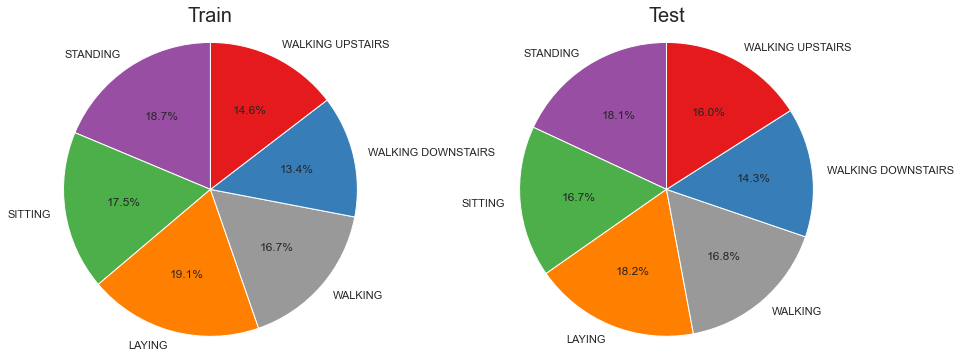

In [5]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)

ytrain_vc = collections.Counter(ytrain_label)
labels = ytrain_vc.keys()
colors = [COLOR_DIC[x] for x in labels]
sizes = [ytrain_vc[c] for c in labels]
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Train", fontsize=20)

ax = fig.add_subplot(1,2,2)
ytest_vc = collections.Counter(ytest_label)
labels = ytest_vc.keys()
sizes = [ytest_vc[c] for c in labels]
colors = [COLOR_DIC[x] for x in labels]
ax.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title("Test", fontsize=20)

plt.show()

### Exploration 

The following code allows to display the results of the PCA on the features data. 

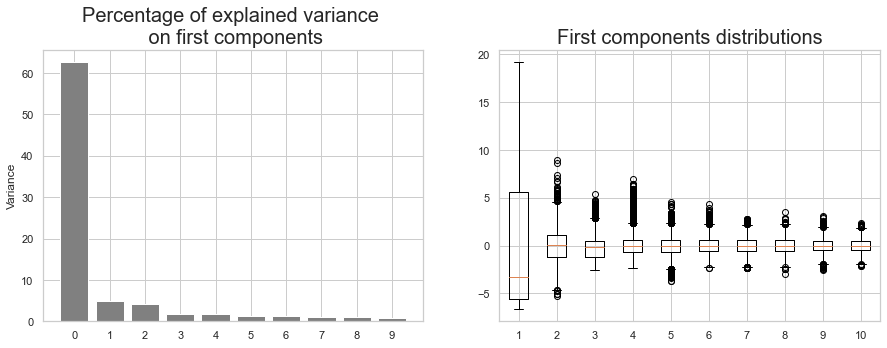

In [6]:
pca = sdec.PCA()
X_r = pca.fit_transform(XTrainFeatures)
fig = plt.figure(figsize=(15,5))
uil.plot_variance_acp(fig, pca, X_r)

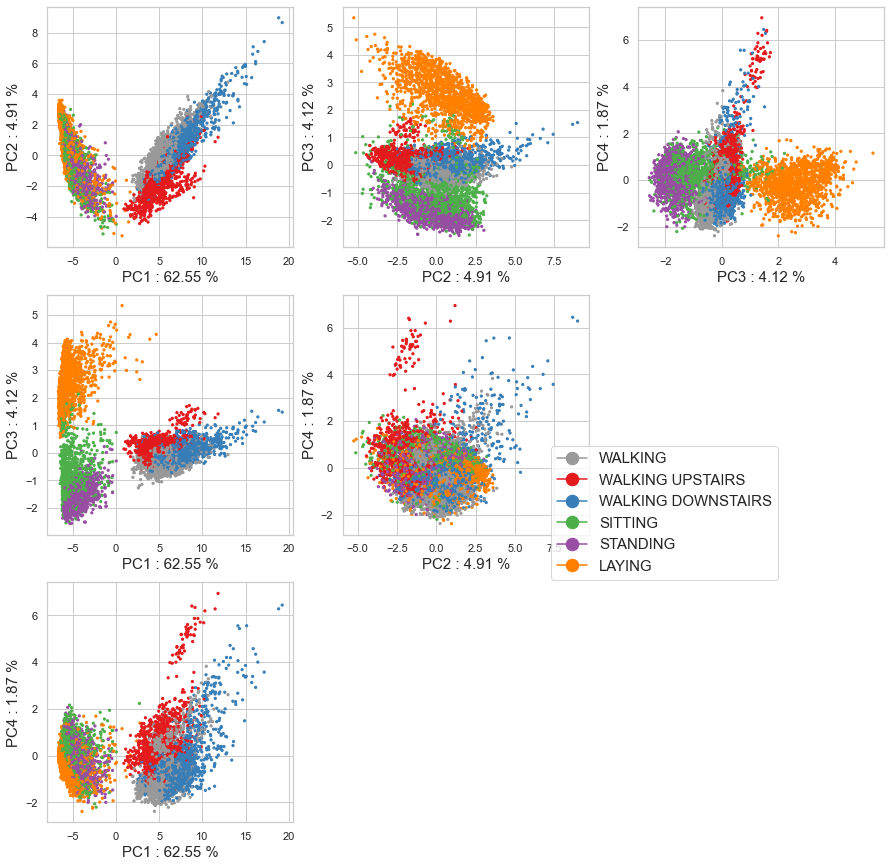

In [7]:
colors=[COLOR_DIC[y] for y in ytrain_label]
markersizes = [20 for y in ytrain]

fig = plt.figure(figsize= (15,15))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax, X_r, pca, nbc, nbc2, colors, markersizes)

#Build legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLOR_DIC[act],marker=".", linestyle=None, markersize=25, label=act)for act in ACTIVITY_DIC.values()]
plt.legend(handles=legend_elements,loc='upper right', bbox_to_anchor=(3, 1.6),fontsize=15)
plt.show()

In [8]:
# code supplémentaire pour répondre aux questions...
print(XTrainFeatures.shape)
print(X_r.shape)
seuil = 0.95
total_var = 0
for i,var in enumerate(pca.explained_variance_ratio_):
    total_var += var
    if total_var >= seuil:
        print(i+1," composantes expliquent ",seuil," % de la variance")
        break

(7352, 561)
(7352, 561)
67  composantes expliquent  0.95  % de la variance


**Q** How is the PCA performing? How many components, among 561, would we need to describe the data?

L'ACP montre en premier lieu une première composante principale PC1, qui explique à elle seule 60% de la variance. Les autres composantes expliquent 5% ou moins de la variance.
Avec l'attribut pca.explained_variance_ratio_, on voit par exemple (cf snippet plus haut) que 95% de la variance est expliquée par les 67 premières composantes (sur un espace de départ de dimension 561)

**Q** Comment the separation you can see on the first axis

Cette PC1 discrimine clairement entre les situations 'actives' (walking, walking up, walking down), et les situations 'inactives' (stading, sitting, lying).

**Q** What can you say about the shape of the cloud?

La plupart des nuages, en deux dimensions, sont vaguement ellipsoïdes, ce qui laisse présager des distributions Gaussiennes.

**Q** What can you say about classes separation?

La séparation par PC1 est claire. On voit sur certains schémas (PC1 vs PC3 par exemple) qu'il y a une certaine séparation. Bref, c'est encourageant.

### Supervised classification  with the [logistic regression](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)

####  Principle 

The `Logistic Regression` is a very simple and classical statistical method for supervised classification,  but it is very effective on these features data. Logistic regression is suitable for predicting a binary variable. In the multiclass case, the logistic function of the `Scikit-learn` library estimates *by default* ** one model per class **: one class against the others.

The probability that one individual belongs to some class is modeled using a linear combination of the explanatory variables (features). To transform a real-valued linear combination  into a probability with values in the interval $ [0, 1] $, a sigmoidal function is applied. This gives :
$$P(y_i=1/X)=\frac{e^{Xb}}{1+e^{Xb}}$$
or equivalently
$$\log\frac{P(y_i=1/X)}{1-P(y_i=1/X)}=Xb.$$

The class affected to one individual is the one corresponding to the highest predicted probability. 

####  Estimation  of the model without optimization

The model is estimated without trying to refine the values of certain parameters (penalization). 

**NB** If you want to go further on the analysis of the features data, and study the performances of different algorithms such as  SVM,  discriminant analysis, $k$nearest neighbours, random forests, neural networks...see the corresponding notebook at `../data/HumanActivityRecognition/former_notebook`



Score : 0.961317, time running : 22 secondes


<AxesSubplot:xlabel='Pred', ylabel='True'>

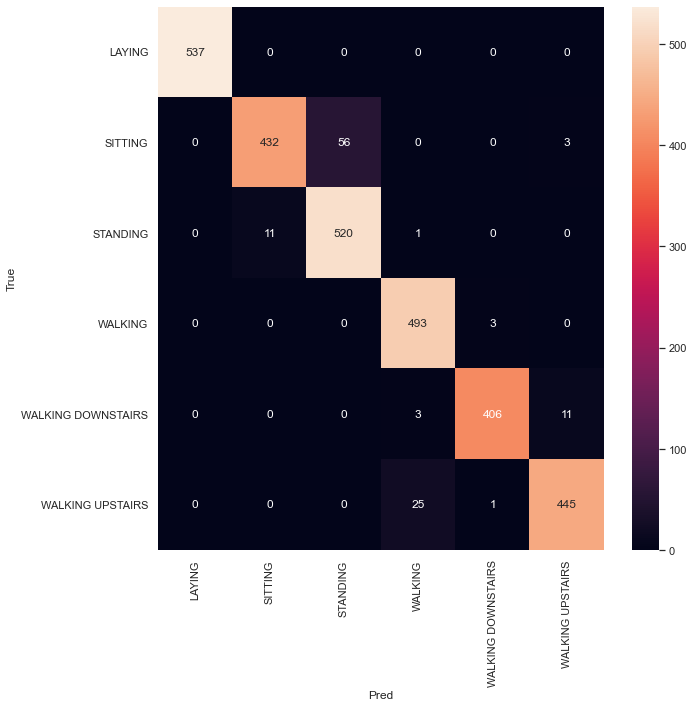

In [9]:
from sklearn.linear_model import LogisticRegression
ts = time.time()
method = LogisticRegression(max_iter=2000)  # ajustement par rapport au code initial, pour converger
method.fit(XTrainFeatures,ytrain)
score = method.score(XTestFeatures, ytest)
ypred = method.predict(XTestFeatures)
ypred_label = np.array([ACTIVITY_DIC[y] for y in ypred])
te = time.time()

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

**Q.** Comments the quality of the results. Are they coherent with the exploration stage?

Les résultats sont excellents, avec une accuracy de 96%, une séparation quasi-parfaite entre les situations 'actives' (walking, walking up, walking down), et les situations 'inactives' (stading, sitting, lying).
La séparation est un peu moins nette entre les différentes formes de 'walking' - par exemple, 26 des 'walking upstairs' sont misclassifiés (en 25 'walking' et 1 'walking downstairs'), soit un TFP = 26 / (445+25+1) = 5,5% - mais l'ensemble reste excellent.

Un modèle simple de RL sur les data dans l'espace des features est donc excellent.

## Raw Signals 

We will now try to achieve on the original signal data the same performance for the  classification as the one we got on the features data. We first read the data.

In [10]:
#Multidimensional Data
XTrainSignals, XTestSignals = ul.load_signals(DATA_PATH, "train", SIGNALS), ul.load_signals(DATA_PATH, "test", SIGNALS)
N_train, N_dim, N_signaux  = XTrainSignals.shape
N_test, _, _  = XTestSignals.shape
print("X Train data dimensions %d X %d X %d" %(XTrainSignals.shape))
print("X Test data dimensions %d X %d X %d" %(XTestSignals.shape))

X Train data dimensions 7352 X 128 X 9
X Test data dimensions 2947 X 128 X 9


Some of the studies we will produce on the data require the data to be 1-dimensional. This is  why we produce *flatten* data that will gather in a single vector the $9$ signals per individual and produce 1D vectors of size 128X9 = 1152. 

In [11]:
#Flatten_data
XTrainFlatten = XTrainSignals.reshape((N_train, N_dim*N_signaux), order="F")
XTestFlatten = XTestSignals.reshape((N_test, N_dim*N_signaux), order="F")
print("X Train data dimensions %d X %d" %(XTrainFlatten.shape))
print("X Test data dimensions %d X %d" %(XTestFlatten.shape))

X Train data dimensions 7352 X 1152
X Test data dimensions 2947 X 1152


### Visualize the signals

#### Display all signals

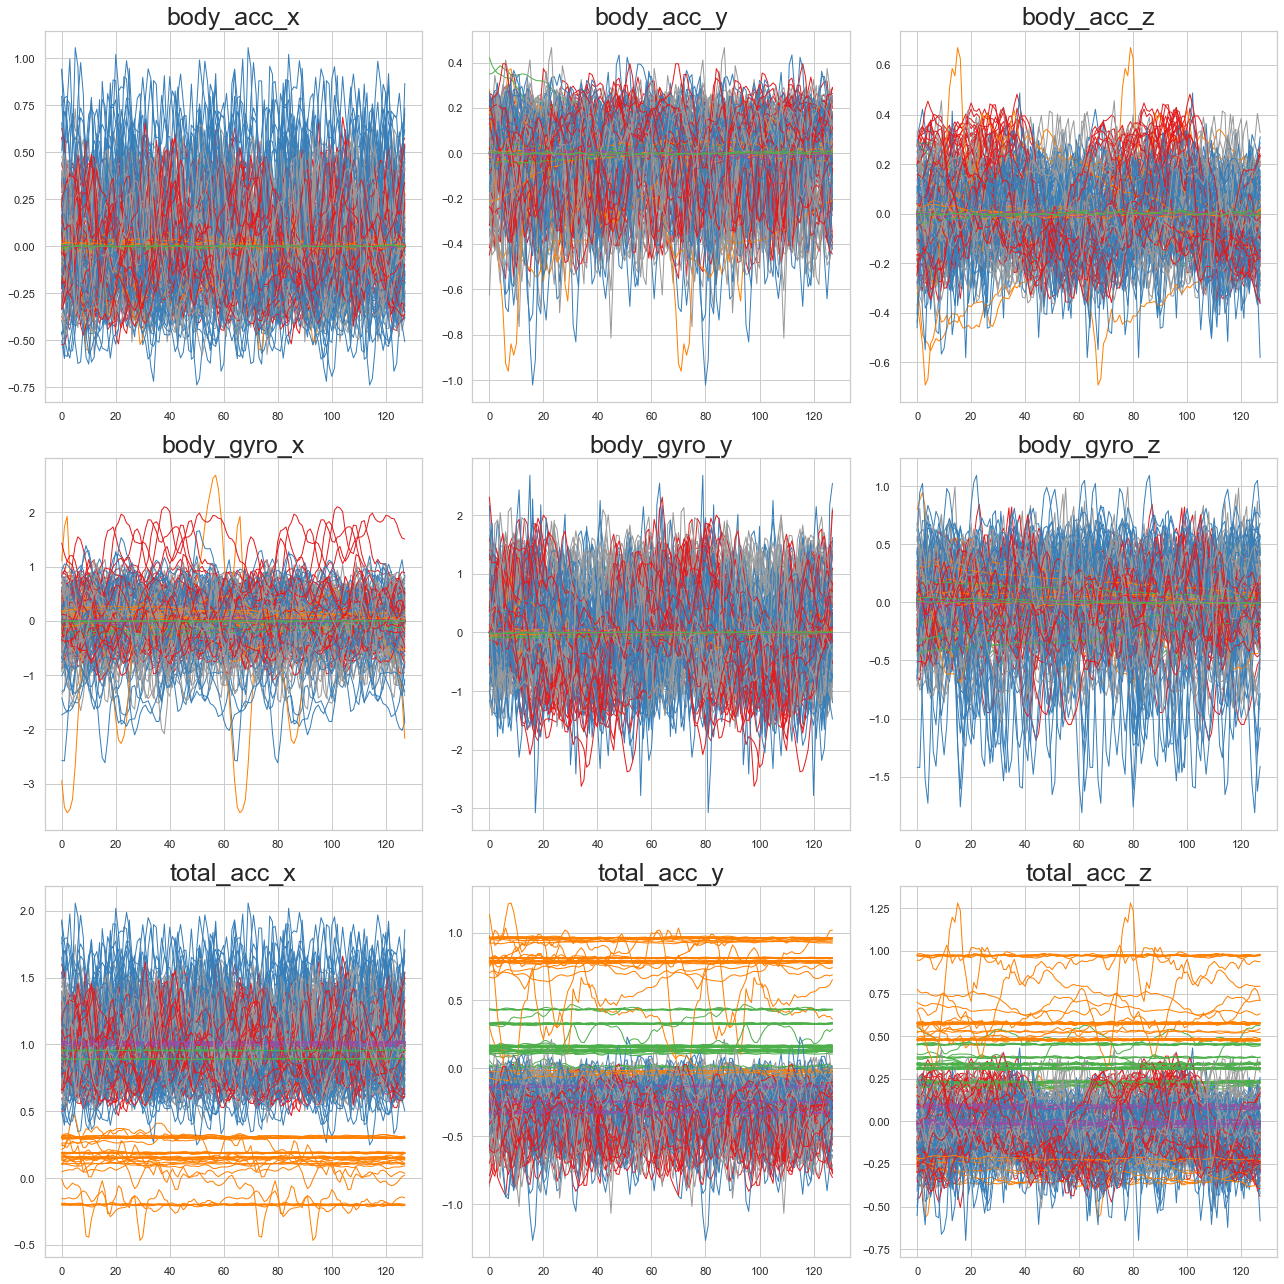

In [12]:
nb_sample_per_activity = dict([(v,50) for k,v in ACTIVITY_DIC.items()])
linestyle_per_activity = dict([(v,"solid") for k,v in ACTIVITY_DIC.items()])
linewidth_per_activity = dict([(v,1)for k,v in ACTIVITY_DIC.items()])

fig = plt.figure(figsize=(18,18))    
uil.plot_signaux(fig, XTrainSignals, np.array(ytrain_label), SIGNALS, COLOR_DIC, nb_sample_per_activity, 
             linestyle_per_activity, linewidth_per_activity, figdim1 = 3, figdim2 = 3, shuffle=True, legend=False)

#### Display only one signal
We only represent here the first signal (body acceleration in x), for the 6 classes, on $10$ individuals. 

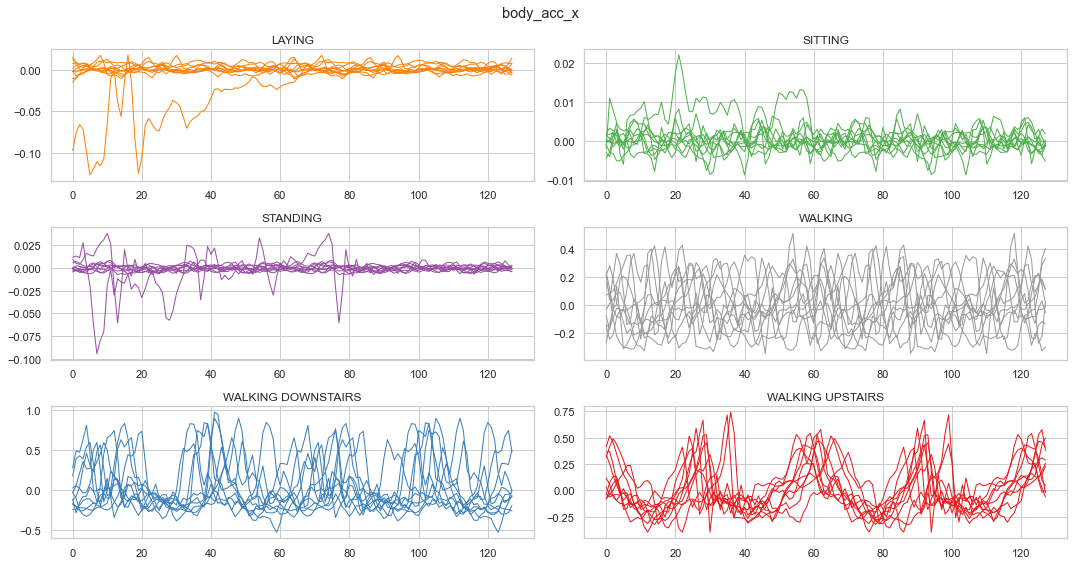

In [13]:
fig = plt.figure(figsize=(15,8))
nb_sample = 10
isignal=0    
uil.plot_signal_per_activity(fig, XTestSignals, ytest_label, nb_sample, isignal, SIGNALS, COLOR_DIC)

**Q** Choose one of the signal (Walking upstairs for example). What makes the Euclidean metric (L2) ineffective for this signal?

==> ?

**Q** Why it is interesting to decompose the signal in the frequency domain in term of correlation?

On voit clairement sur ce signal 'body_acc' (l'accélération globale de l'individu) des composantes importantes de fréquences différentes : une composantes de fréquence nulle pour les situations inactives (plus exactement immobiles), une composante de fréquence plus élevée (correspondant probablement aux passages d'une marche à l'autre) pour les 'walking up & down', et des composantes de haute fréquence, qui peuvent peut-être s'assimiler à du bruit.

Bref - l'analyse en fréquence semble permettre de séparer les différentes classes.

### Exploration

####  Principal Components Analysis
##### On one signal

PCA on  signal : body_gyro_y


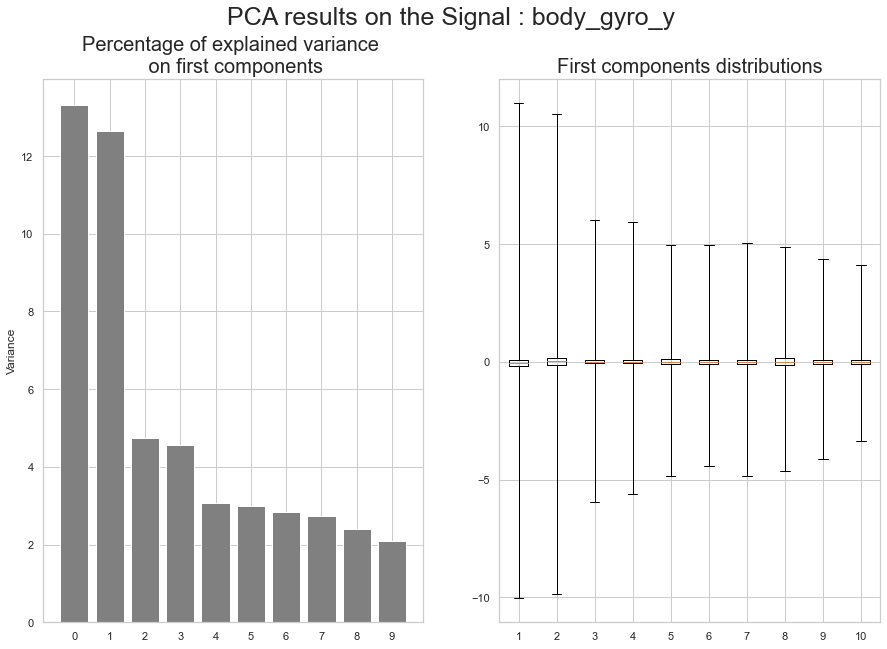

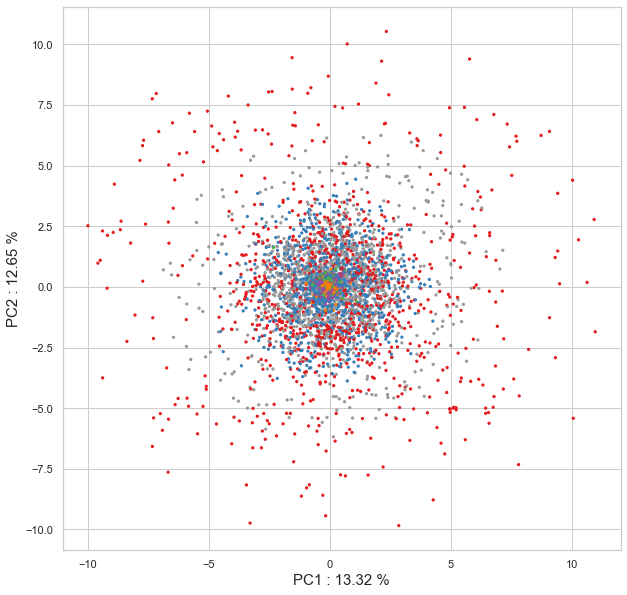

In [14]:
pca = sdec.PCA()
isignal = 4
signal = SIGNALS[isignal]
print("PCA on  signal : " +signal)
X_r = pca.fit_transform(XTrainSignals[:,:,isignal])

fig = plt.figure(figsize=(15,10))
uil.plot_variance_acp(fig, pca, X_r, whis=100)
fig.suptitle(" PCA results on the Signal : " + signal, fontsize=25)

colors=[COLOR_DIC[y] for y in ytrain_label]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
uil.plot_pca(ax,X_r, pca, 1, 2, colors, markersizes)

##### Over all signals

PCA on all the signals


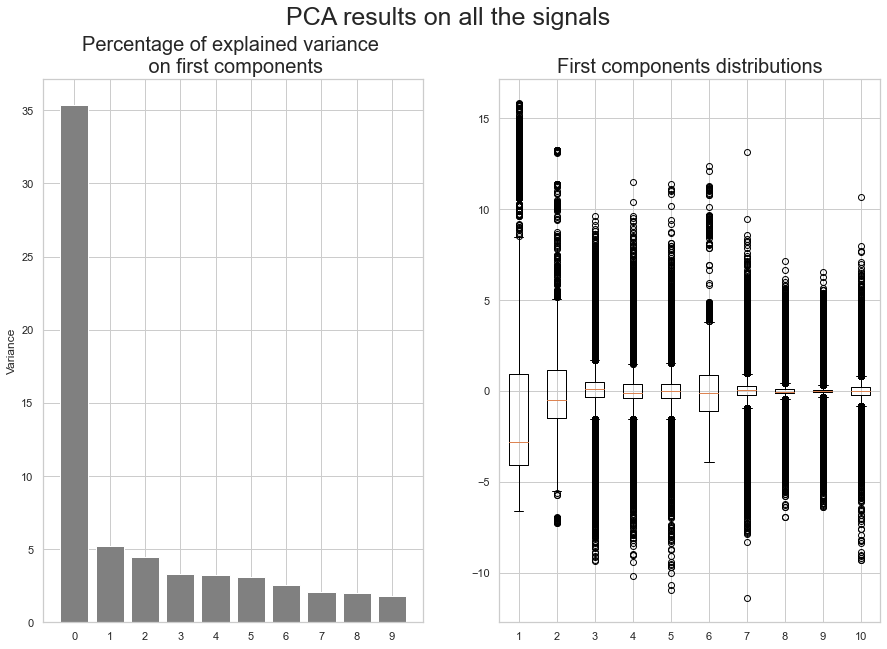

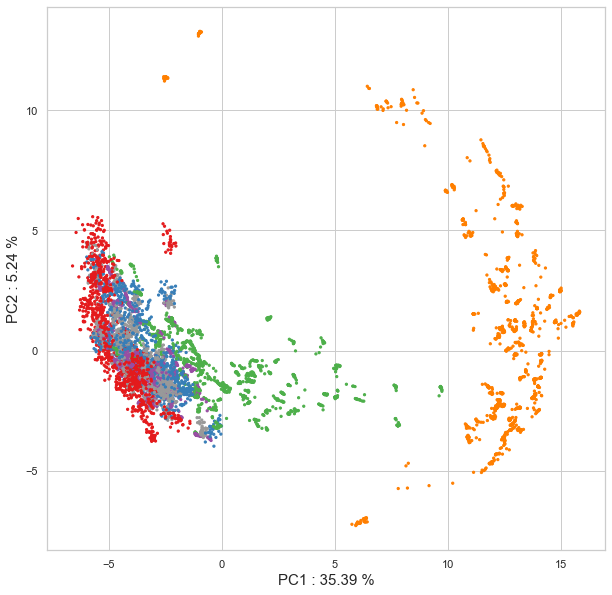

In [15]:
pca = sdec.PCA()
print("PCA on all the signals")
X_r = pca.fit_transform(XTrainFlatten)
fig = plt.figure(figsize=(15,10))
uil.plot_variance_acp(fig, pca, X_r)
fig.suptitle("PCA results on all the signals", fontsize=25)
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
uil.plot_pca(ax,X_r, pca, 1, 2, colors, markersizes)

#### Linear discriminant analysis
##### on one signal

LDA on  signal : body_acc_x


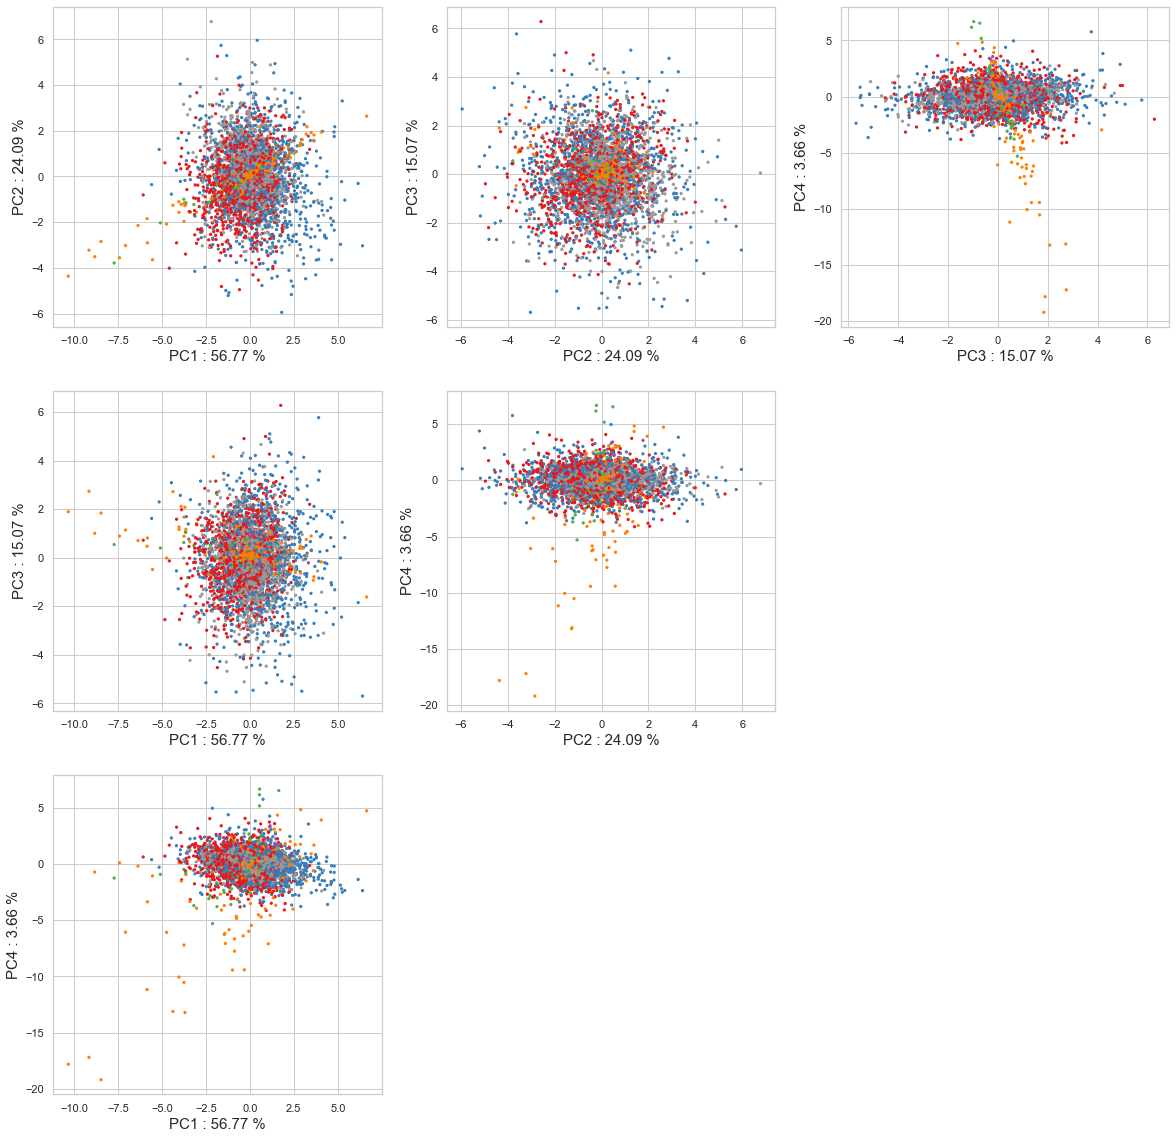

In [16]:
isignal = 0
signal = SIGNALS[isignal]
print("LDA on  signal : " +signal)

method = sda.LinearDiscriminantAnalysis() 
lda=method.fit(XTrainSignals[:,:,isignal],ytrain_label)
X_r2=lda.transform(XTrainSignals[:,:,isignal])

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax,X_r2, lda, nbc, nbc2, colors, markersizes)
plt.show()

##### over all signals

LDA on all the signals


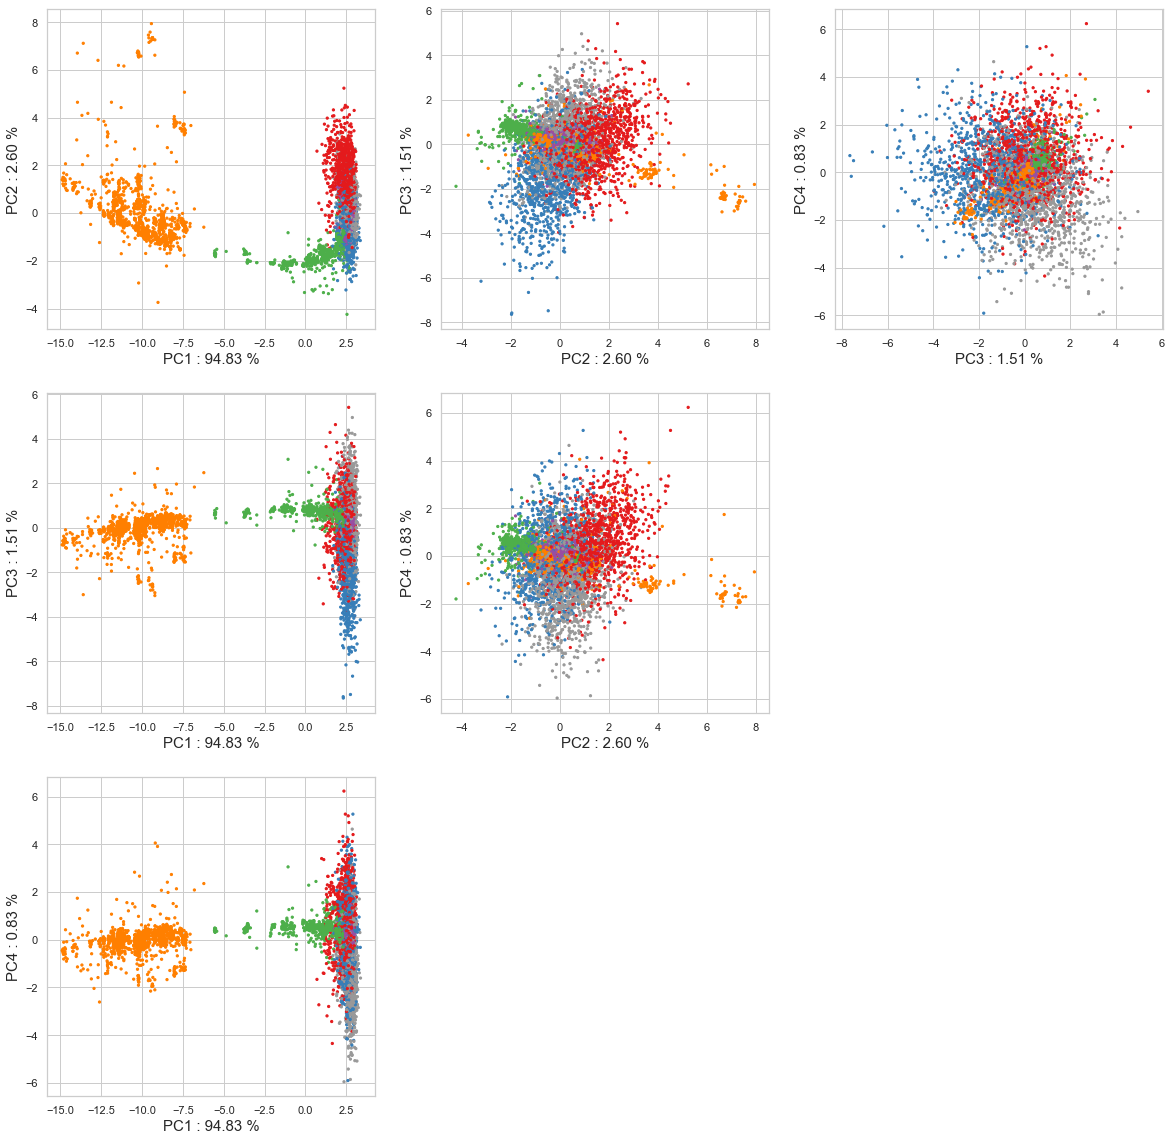

In [17]:
print("LDA on all the signals")

method = sda.LinearDiscriminantAnalysis() 
lda=method.fit(XTrainFlatten,ytrain_label)
X_r2=lda.transform(XTrainFlatten)

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax,X_r2, lda, nbc, nbc2, colors, markersizes)
plt.show()

### Supervised classification with the logistic regression on the raw signals

Score : 0.568714, time running : 79 secondes


<AxesSubplot:xlabel='Pred', ylabel='True'>

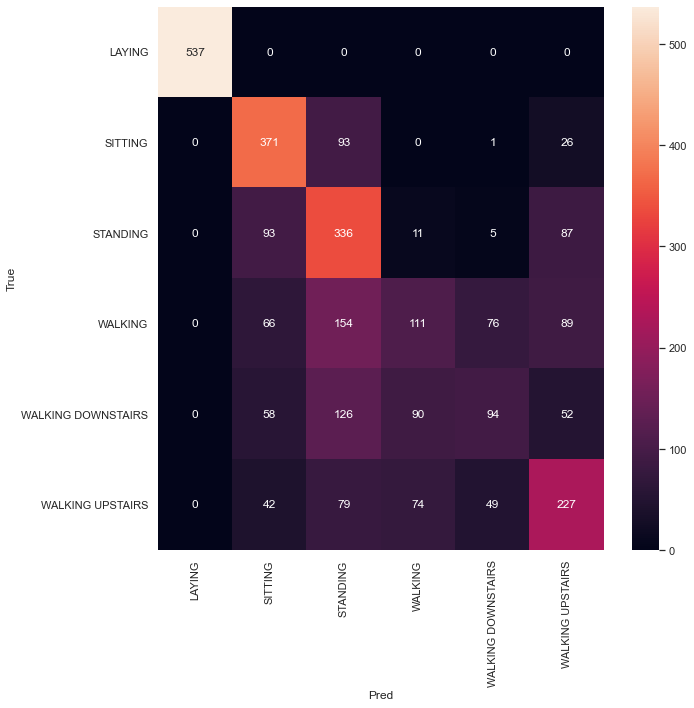

In [18]:
ts = time.time()
method = LogisticRegression(max_iter=3000) # augmente le nombre d'itérations pour convergence
method.fit(XTrainFlatten,ytrain)
score = method.score(XTestFlatten, ytest)
ypred = method.predict(XTestFlatten)
ypred_label = np.array([ACTIVITY_DIC[y] for y in ypred])
te = time.time()

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

**Q** What can you say about these results?

Les résultats sont clairement mauvais, comme la faible séparation des classes le laissait présager dans la PCA. Faible accuracy (56%), beaucoup de faux positifs...

**Exercise** If you have time at the end of the TP, try to achieve better results, using different models (SVM, Random Forest, Xgboost) of different combination of the signal

## Wavelet Decomposition of the raw signals

Since the supervised classification performed on the raw signal gives bad performances, we try to improve these results by transforming the raw signals with a wavelet decomposition. 

### Coefficient Illustration

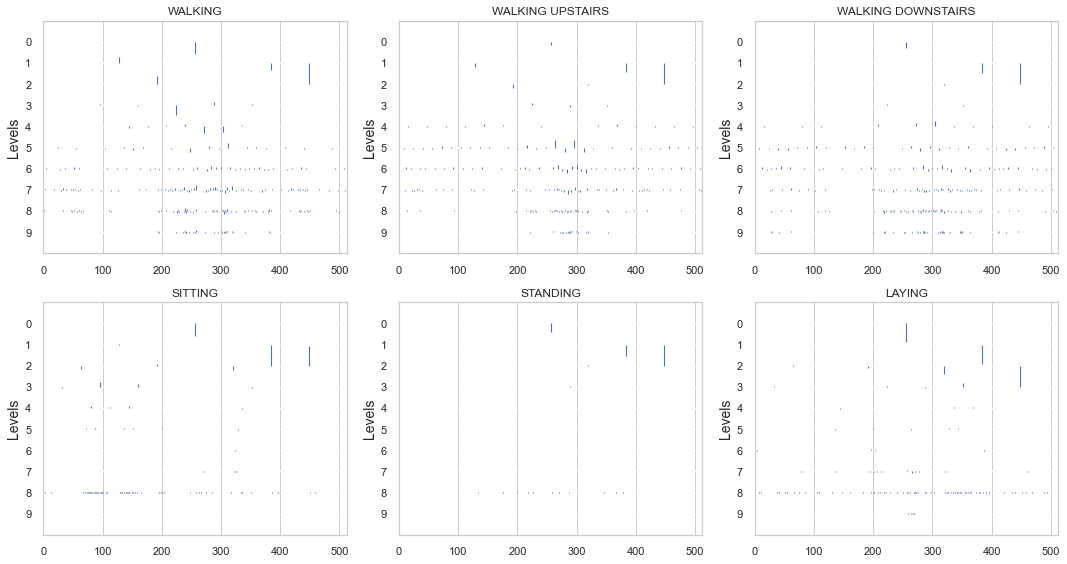

In [19]:
sample_to_plot = 1
index_per_act_dict = dict([(act, np.where(ytrain==act)[0][:sample_to_plot]) for act in range(1,7)])

fig = plt.figure(figsize=(15,8))
for ip, (act , index) in enumerate(index_per_act_dict.items()):
    ax=fig.add_subplot(2,3,ip+1)
    coef = pywt.wavedec(XTrainFlatten[index,:1024], 'db1')
    uil.coef_pyramid_plot(ax, coef[1:]) ;

    ax.set_title(ACTIVITY_DIC[act]);
fig.tight_layout()
plt.show()

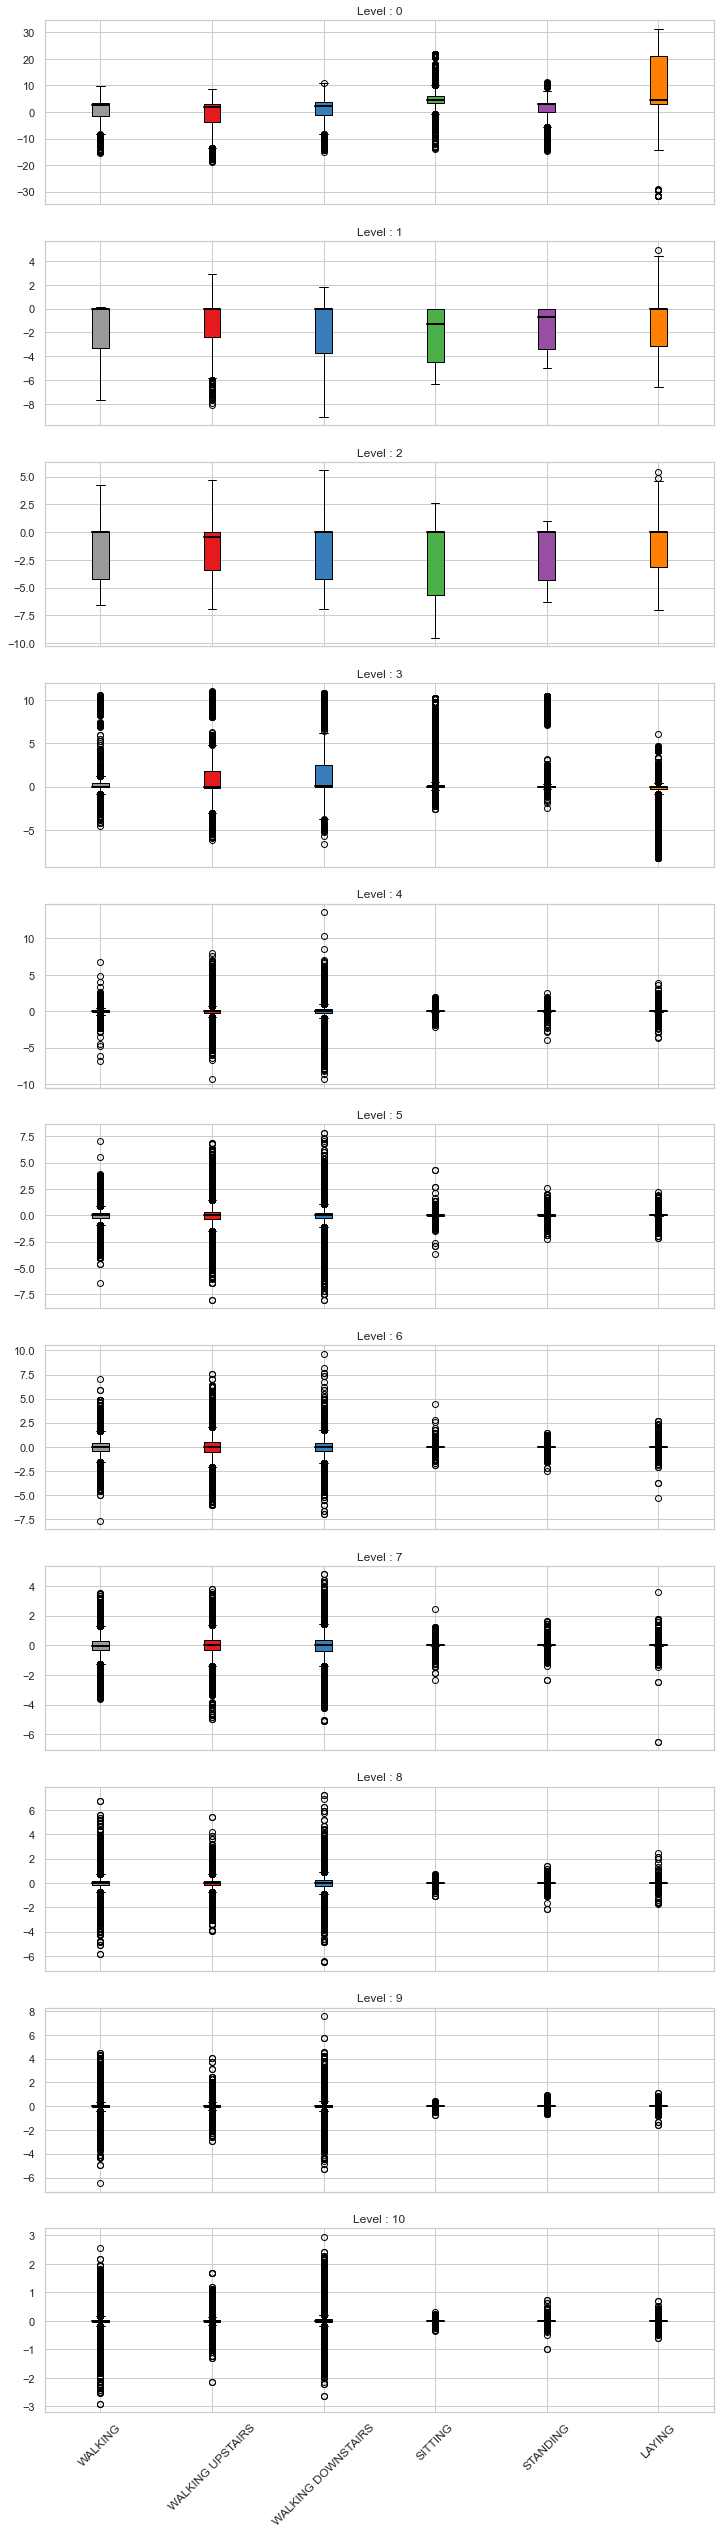

In [20]:
X_train_db_list = pywt.wavedec(XTrainFlatten, 'db1')
N_per_activity_train = collections.Counter(np.array(ytrain))
uil.plot_boxplot_coef_concat_per_signal(X_train_db_list, np.array(ytrain), labels=LABELS, activity_dic=ACTIVITY_DIC, 
                             color_dic=COLOR_DIC, N_per_activity_train= N_per_activity_train)

**Q.** Explain what is represented on all theses graphs. 

Le premier morceau de code exécute une transformation discrète en ondelettes (ACP fonctionnelle particulière), en une dimension, sur les données 'flattened' segmentées par classe. (fonction : https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html#multilevel-decomposition-using-wavedec )

Plus précisement, "coef = pywt.wavedec(XTrainFlatten[index,:1024], 'db1')" va éxécuter la DWT (Discrete Wavelet Transform) sur chacune des six parties de XTrainFlatten correspondant à une classe chacune, avec la famille d'ondelettes 'db1' (Daubechies Wavelets 1, cf https://en.wikipedia.org/wiki/Daubechies_wavelet ), cad une base orthonormée (ou base orthogonale seulement ?) de fonctions, sur laquelle le signal et ses composantes fonctionnelles principales sont décomposés en une combinaison linéaire.

Le nombre de levels (la dimension de l'espace sur lequel le signal et ses CP sont projetés) est laissé au code : le 'decomposition level' (paramètre level) est par défaut calculé par la fonction dwt_max_level. C'est, d'après ce que j'ai compris, le nombre au-delà duquel l'information qui reste présente dans le signal non encore décomposé est trop petite par rapport aux ondelettes employées. (source/article à trouver...). Dans les faits, 11 levels suffisent aux décompositions. C'est en quelque sorte la dimension pertinente de l'espace projeté, qui permet d'expliquer la très grande partie de la variance : 11 ondelettes permettent d'expliquer le signal et ses composantes fonctionnelles principales. Je connais peu les ondelettes, mais je soupçonne une "montée en fréquence" des ondelettes (un peu comme une décomposition en série de Fourier). Auquel cas, la perte de pertinence en montant en fréquence rappelerait le théorème de Shannon ? mais je m'égare :-)

Une fois qu'on a dit ça - le premier groupe de graphes (par classe donc) est la répartition des coefficients par level. Ceci dit, je n'ai pas compris ce qu'il y a en abscisse. On semble distinguer plus de 'hauts levels' dans les situations actives/mobiles, mais difficile d'en dire plus sans comprendre les abscisses.

Les dix graphes suivants sont les boxplots (là je comprends mieux...) des coefficients de la DWT par level et par classe (un peu la même information que "l'ébouli des valeurs propres" en ACP classique). Par exemple, la situation 'laying' est décrite principalement par les levels 0,1 et 2, avec des boxplots 'propres' avec peu d'outliers et une part de variance importante : la fonction correspondant à 'laying' est donc expliquée principalement par trois composantes fonctionnelles principales des trois fréquences les plus basses. A contrario, l'activité 'walking' (grise) est surtout décrite (=expliquée en terme de variance) par les levels 1,2 puis 0 dans une moindre mesure. Le level 0 correspondant à la plus basse fréquence, cela peut se comprendre.

On voit aussi que les hauts levels (4 et au-delà) ont des boxplots très fins avec beaucoup d'outliers : il s'agit en majorité de bruit à fréquences hautes.

### Exploration of the wavelet coefficients

#### PCA on all the coefficients

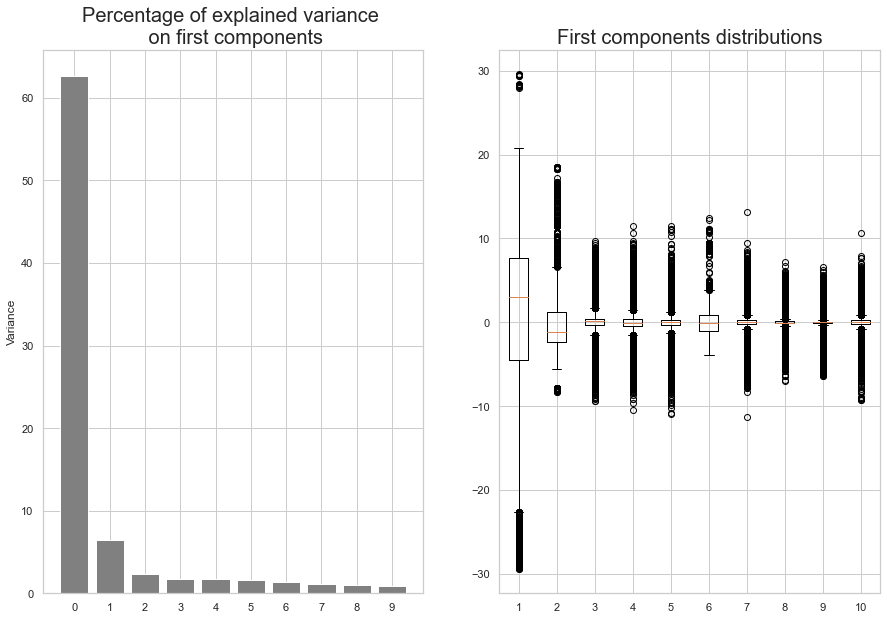

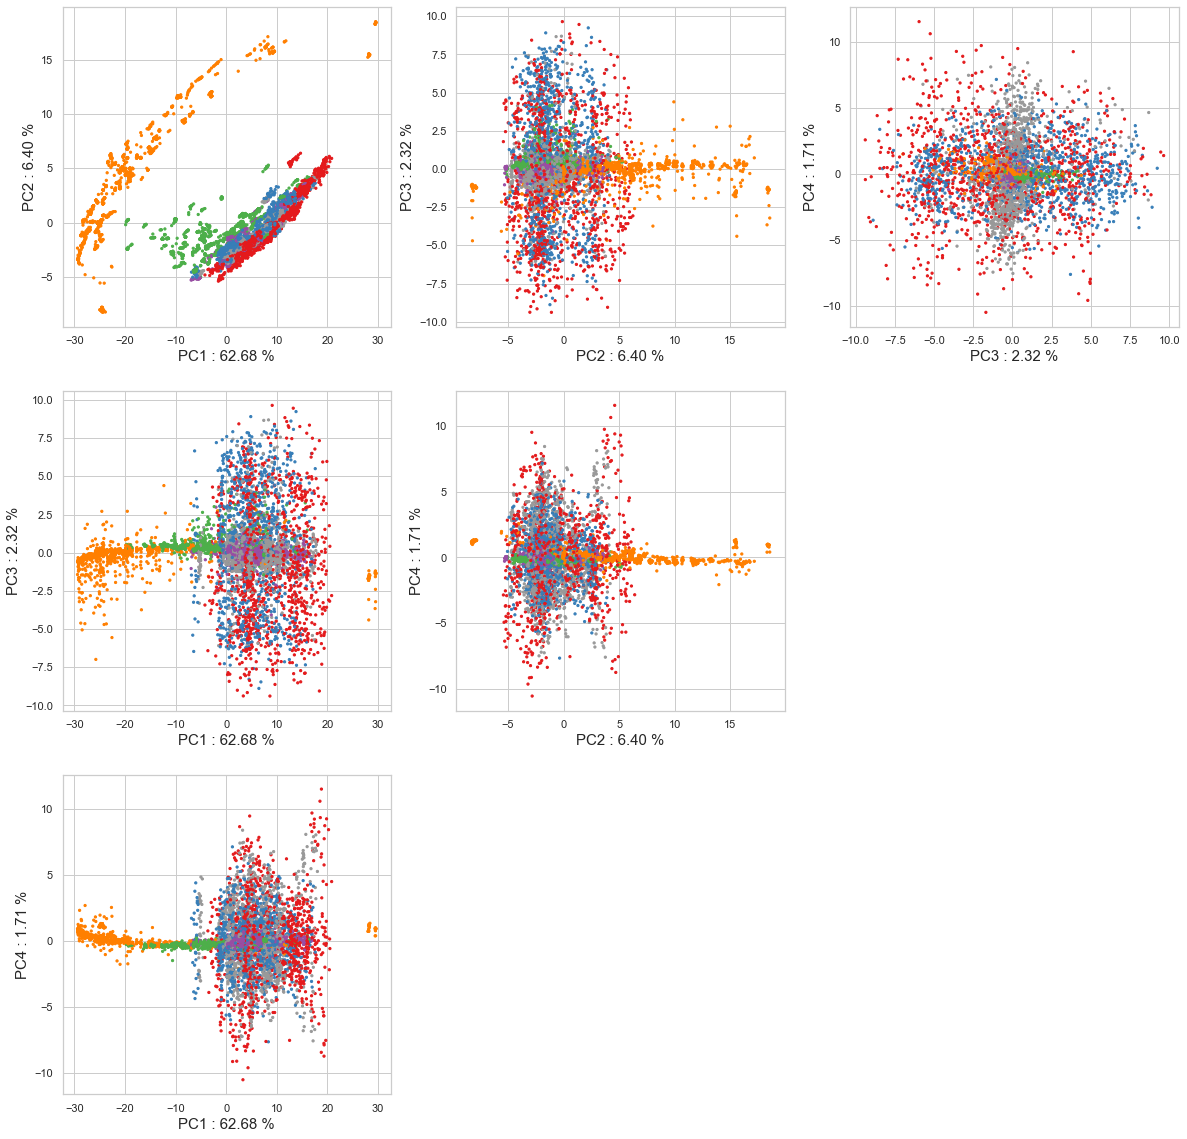

(7352, 1155)


In [21]:
X_train_db = np.concatenate(pywt.wavedec(XTrainFlatten, 'db1'), axis=1)
X_test_db = np.concatenate(pywt.wavedec(XTestFlatten, 'db1'), axis=1)

## PCA 
pca = sdec.PCA()
X_train_db_pca = pca.fit_transform(X_train_db)

fig = plt.figure(figsize=(15,10))
uil.plot_variance_acp(fig, pca, X_train_db_pca)

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax,X_train_db_pca, pca, nbc, nbc2, colors, markersizes)
plt.show()

print(X_train_db.shape)  # regarde la dimension de l'espace des coefficients

#### On the thresholded coefficients

We use a soft thresholding on the wavelet coefficients in order to remove some noise from the data.

In [22]:
sigma_test = 0.01 # pour tester différentes valeurs de sigma

In [23]:
# un peu de code pour comprendre
sigma=sigma_test
thresh = sigma*np.sqrt(2*np.log((XTrainFlatten.shape[1])))
print("pour sigma = ", sigma, " seuil = ",thresh)

pour sigma =  0.01  seuil =  0.03754798221277899


In [24]:
cA10, cD10, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(XTrainFlatten, 'db1')

sigma=sigma_test
thresh = sigma*np.sqrt(2*np.log((XTrainFlatten.shape[1])))

# On seuille seulement les coefficients de détail : 
cD10=pywt.threshold(cD10, thresh, 'soft')
cD9=pywt.threshold(cD9, thresh, 'soft')
cD8=pywt.threshold(cD8, thresh, 'soft')
cD7=pywt.threshold(cD7, thresh, 'soft')
cD6=pywt.threshold(cD6, thresh, 'soft')
cD5=pywt.threshold(cD5, thresh, 'soft')
cD4=pywt.threshold(cD4, thresh, 'soft')
cD3=pywt.threshold(cD3, thresh, 'soft')
cD2=pywt.threshold(cD2, thresh, 'soft')
cD1=pywt.threshold(cD1, thresh, 'soft')

X_train_dbth = np.concatenate((cA10, cD10, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1), axis=1)

In [25]:
cA10, cD10, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(XTestFlatten, 'db1')

sigma=sigma_test
thresh = sigma*np.sqrt(2*np.log((XTestFlatten.shape[1])))

# On seuille seulement les coefficients de détail : 
cD10=pywt.threshold(cD10, thresh, 'soft')
cD9=pywt.threshold(cD9, thresh, 'soft')
cD8=pywt.threshold(cD8, thresh, 'soft')
cD7=pywt.threshold(cD7, thresh, 'soft')
cD6=pywt.threshold(cD6, thresh, 'soft')
cD5=pywt.threshold(cD5, thresh, 'soft')
cD4=pywt.threshold(cD4, thresh, 'soft')
cD3=pywt.threshold(cD3, thresh, 'soft')
cD2=pywt.threshold(cD2, thresh, 'soft')
cD1=pywt.threshold(cD1, thresh, 'soft')

X_test_dbth = np.concatenate((cA10, cD10, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1), axis=1)

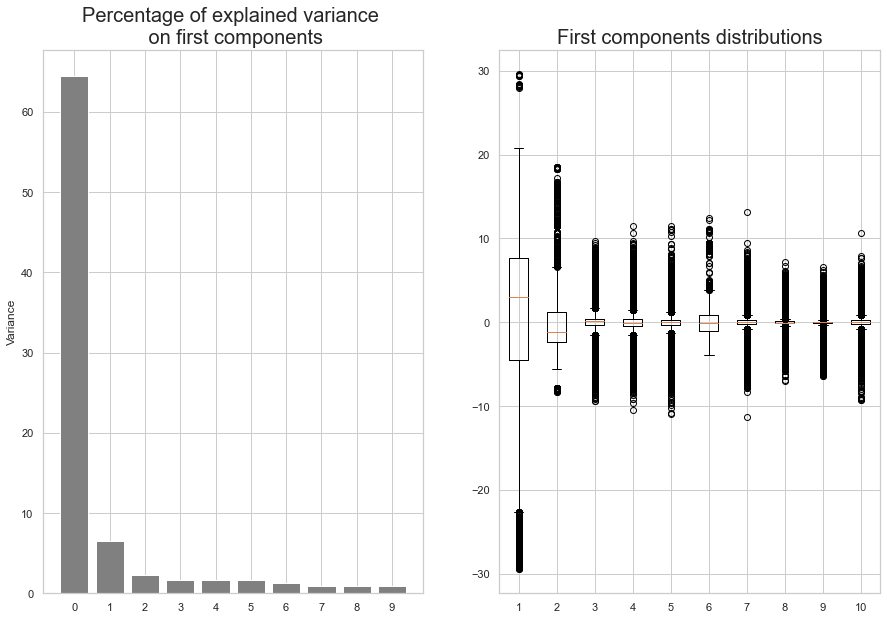

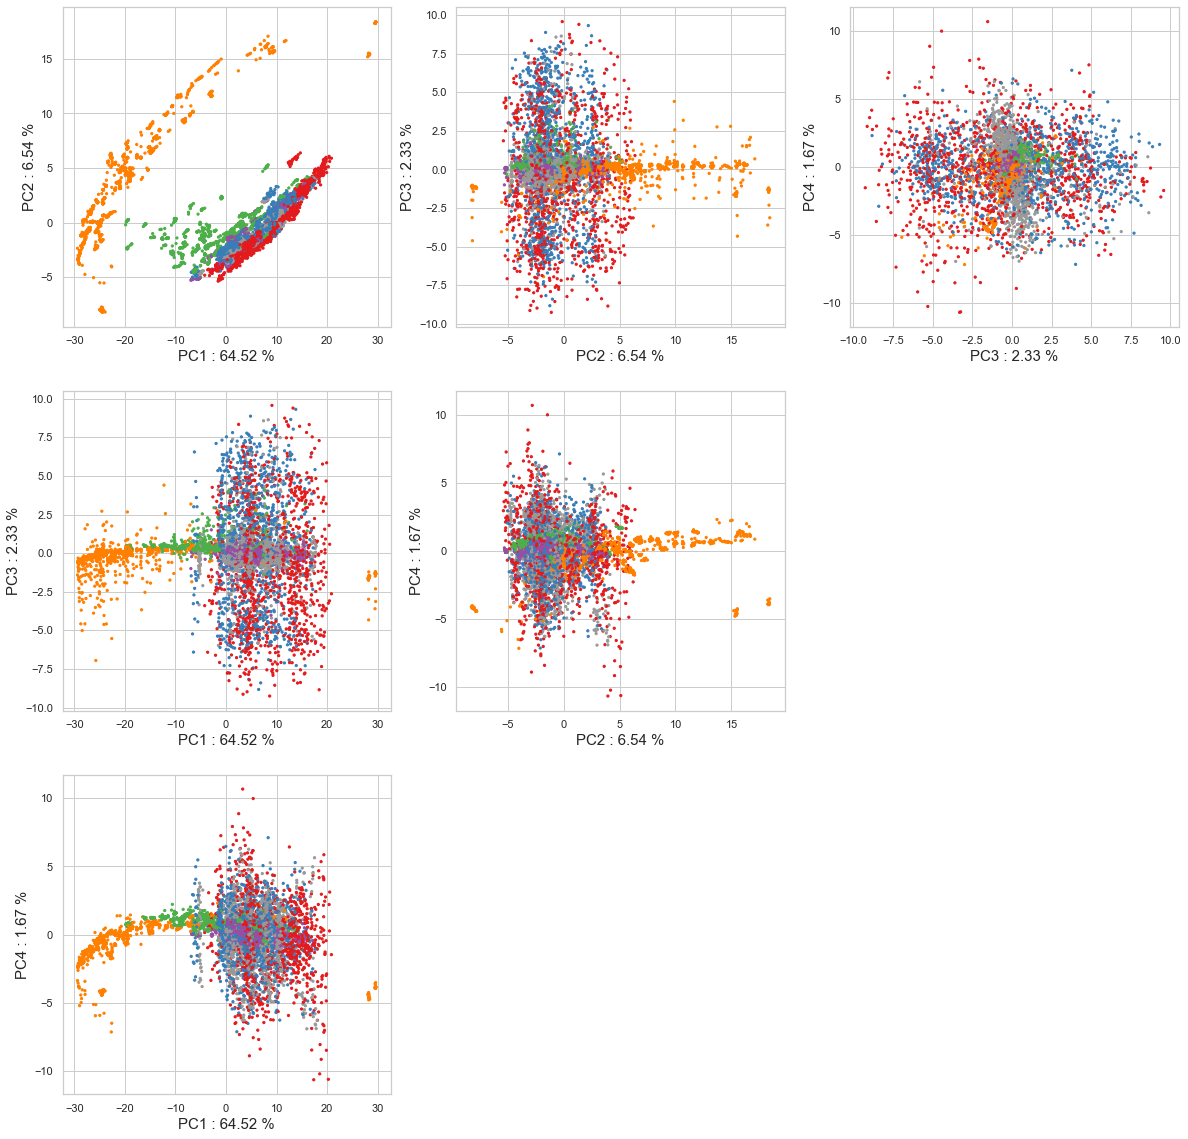

In [26]:
## PCA
pca = sdec.PCA()
X_train_dbth_pca = pca.fit_transform(X_train_dbth)
fig = plt.figure(figsize=(15,10))
uil.plot_variance_acp(fig, pca, X_train_db_pca)
fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax,X_train_dbth_pca, pca, nbc, nbc2, colors, markersizes)
plt.show()

**Q.** Comment the results. Does the thresholding seem to have an influence ? You can change the value of sigma.

On 'seuille' ici sur les coefficients des wavelettes, dans l'espoir de ne garder dans les Composantes Principales Fonctionnelles que les ondelettes suffisamment représentées (avec coeff > seuil), et donc d'éliminer du bruit.

Le seuil est donné par $\sigma \times \sqrt{2 \mathrm{log}(d)}$ avec $d$ la dimension de l'espace des data (soit 1152)

Le seul effet visible d'augmenter $\sigma$ (jusqu'à 0.2) semble être d'augmenter la part relative de la CPF1. Les autres composantes subsistent, ainsi que le bruit.

### Supervised classification with the logistic regression on the wavelet coefficients

Score : 0.636919, time running : 73 secondes


<AxesSubplot:xlabel='Pred', ylabel='True'>

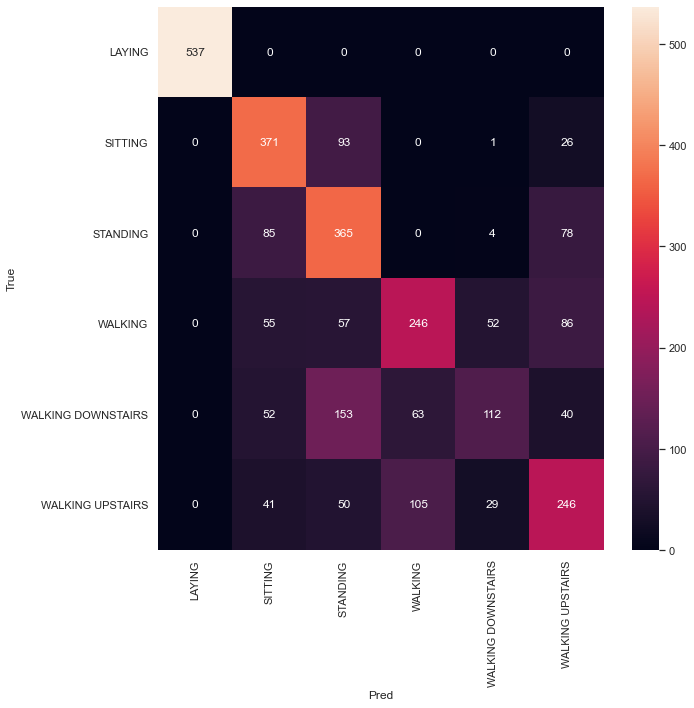

In [27]:
ts = time.time()
method = LogisticRegression(max_iter = 5000)  # ajout max_iter pour convergence
method.fit(X_train_dbth,ytrain)
score = method.score(X_test_dbth, ytest)
ypred = method.predict(X_test_dbth)
ypred_label = np.array([ACTIVITY_DIC[y] for y in ypred])
te = time.time()

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

**Q.** Compare with the results obtained on the raw data and on the features data. 

On fait un peu mieux (accuracy 64%) que le modèle raw+LR (56%), mais on est encore loin du modèle features+LR (96%). Pas encore de moyen pour utiliser les raw data avec de bons résultats.

## Fast Fourier Transform

In [28]:
# Coefficients fft : 

from scipy.fftpack import fft


isignal = 0

XTrain_fftCoeff = []

for x in XTrainFlatten :
    
    mx=np.mean(x)
    x_centre=x-mx
   #Apply fast Fourier transform
    coeffsfft=np.abs(fft(x_centre))  
    coeffsfft_flatten = np.hstack(coeffsfft)
    XTrain_fftCoeff.append(coeffsfft_flatten)
        
XTrain_fftCoeff = np.array(XTrain_fftCoeff)

# Il suffit de garder la moitié des coefficients (ils sont ensuite répétés  de manière symétrique)

XTrain_fftCoeff=XTrain_fftCoeff[:,:64]
print(XTrain_fftCoeff.shape)

(7352, 64)


In [29]:
isignal = 0

XTest_fftCoeff = []

for x in XTestFlatten :
    
    mx=np.mean(x)
    x_centre=x-mx
   #Apply fast Fourier transform
    coeffsfft=np.abs(fft(x_centre))  
    coeffsfft_flatten = np.hstack(coeffsfft)
    XTest_fftCoeff.append(coeffsfft_flatten)
        
XTest_fftCoeff = np.array(XTest_fftCoeff)


XTest_fftCoeff=XTest_fftCoeff[:,:64]
print(XTest_fftCoeff.shape)


(2947, 64)


### PCA for FFT  coefficients 

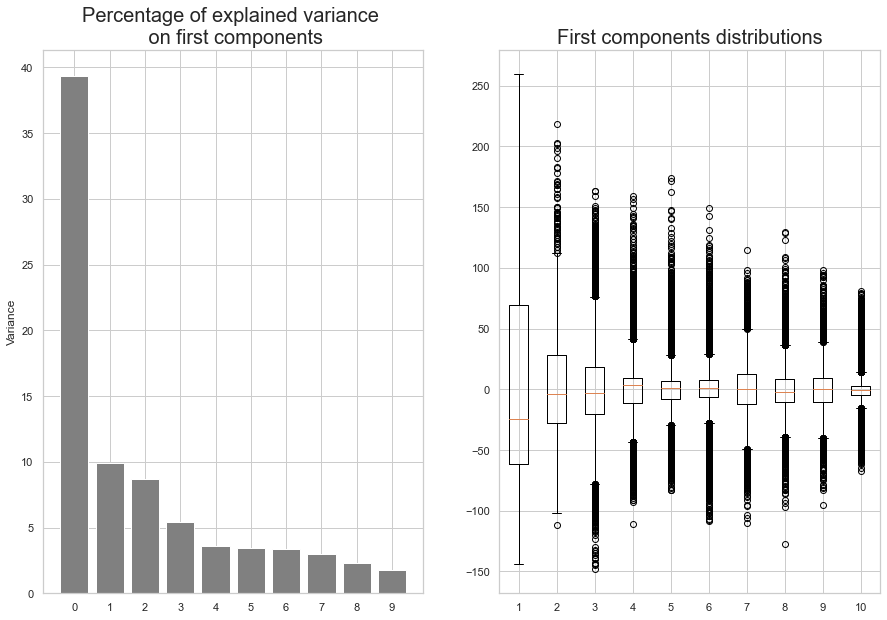

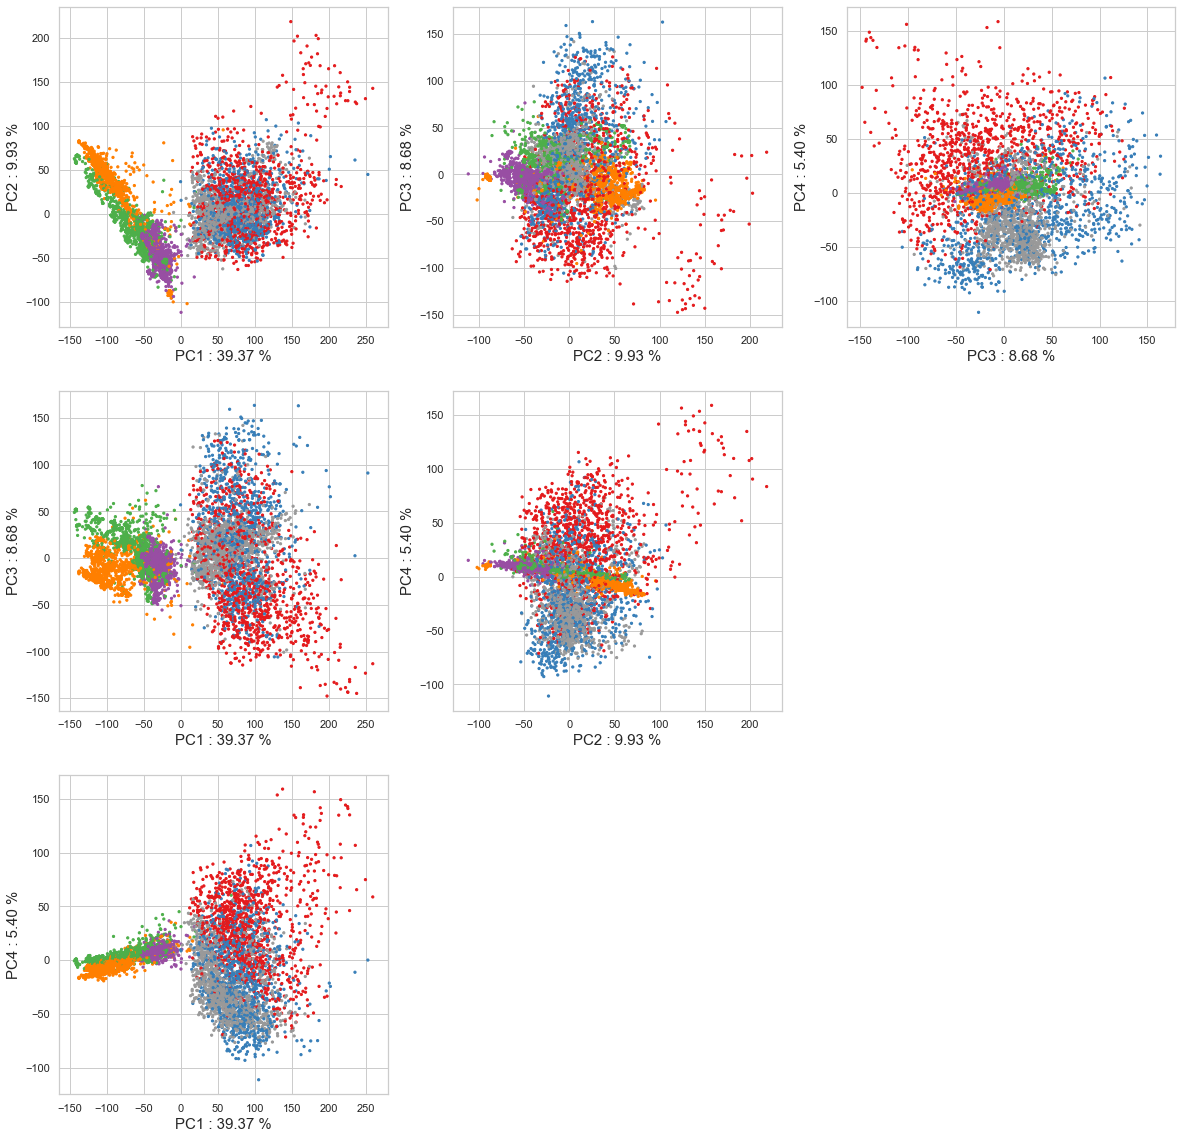

In [30]:

## PCA 
pca = sdec.PCA()
X_train_fftCoeff_pca = pca.fit_transform(XTrain_fftCoeff)

fig = plt.figure(figsize=(15,10))
uil.plot_variance_acp(fig, pca, X_train_fftCoeff_pca)

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2, count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    uil.plot_pca(ax,X_train_fftCoeff_pca, pca, nbc, nbc2, colors, markersizes)
plt.show()

**Q.** Comment the results. Which classes are well separated on the first plane of the PCA ? 

L'ACP via la tranformée de Fourier est a priori plus homogène : un peu moins de 40% de la variance totale est expliquée par la CP1 (vs 60% plus haut), les autres CP ont également des parts de variance plus élevées que dans les ACP plus haut.

Seuls les classes correspondant aux situations inactives/immobiles (standing, sitting, laying) semblent néanmoins se séparer facilement, à la fois entre elles et par rapport aux autres.

### Supervised classification with the logistic regression on the FFT coefficients

Score : 0.821174, time running : 0 secondes


C:\Users\Ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:xlabel='Pred', ylabel='True'>

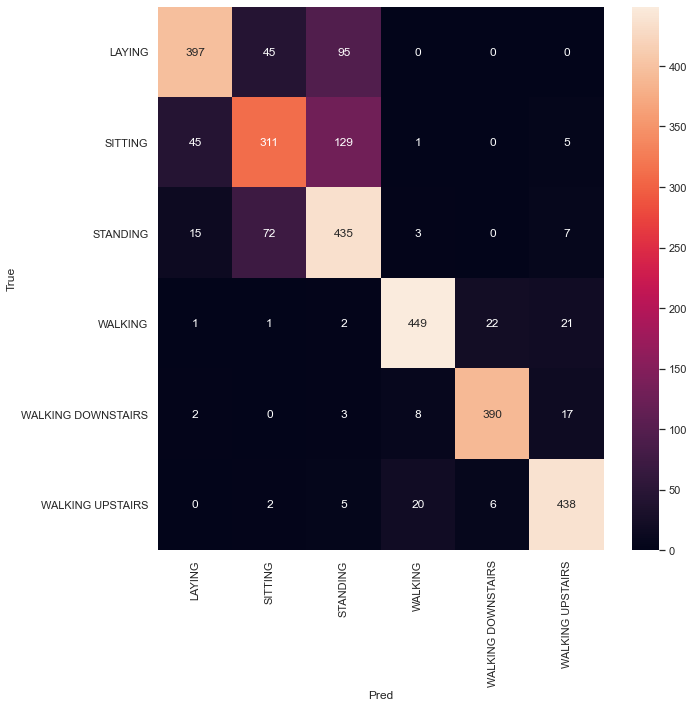

In [31]:
ts = time.time()
method = LogisticRegression() # pas de convergence réussie, malgré essais sur max_iter et tol
method.fit(XTrain_fftCoeff,ytrain)
score = method.score(XTest_fftCoeff, ytest)
ypred = method.predict(XTest_fftCoeff)
ypred_label = np.array([ACTIVITY_DIC[y] for y in ypred])
te = time.time()

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

**Q.** Compare these results with the ones obtained with wavelet coefficients. 

Le modèle raw+FFT a donc 82% d'accuracy (mais je n'arrive pas à le faire converger, malgré des essais sur max_iter et tol). C'est beaucoup mieux que les 64% de raw+wavelets. 

Une explication est que l'ACP montre une répartition de variance plus homogène sur les CP, et en tout cas moins concentré sur la CP1, dans le cas raw+FFT que dans le cas raw+wavelets. Là où la seule discrimination par la CP1 dans le cas raw+wavelets ne permettait que de discriminer l'activité 'laying' vs les autres, le poids plus important des CP2 et CP3 dans le cas raw+FFT permet de discriminer l'ensemble (laying, sitting, standing) vs (walking, walking up, walking down). Néanmoins, la discrimination à l'intérieur de ces blocs reste imparfaite

## Deep Learning

We try here to improve the classification results by applying multilayer perceptrons and  convolutional neural networks on the raw signals. 

As explained in the introduction, calculating many transformations of the data such as the features used in the first part is too resource-consuming for the battery of a connected smartphone. This section proposes to use only the raw signals to train a neural network that could be "wired" in the circuit. Indeed an algorithm such as XGBoost (extreme gradient boosting) also achieves good results on raw signals but at a too high algorithmic cost.

Three algorithms are successively tested: a multilayer perceptron, followed by a 1D convolutional neural network on the flatten signals, and finally a 2D convolutional neural network on the 9 signals.

It should be added that many configurations have been tested, thanks  to the students of INSA Toulouse of the  Applied Mathematics - Data Science speciality, before adopting the ones proposed here. It is a reality of deep learning, without  precise theoretical results, only an experimental  approach  allows to determine a more efficient configuration. Other network architectures would have to be tested to reach the 96% of the previous solution.

**Q.** In each case, describe the model that is used, explain the number of parameters of the model and comment the performances. 

In [32]:
# DEEP LEARNING libraries
import tensorflow as tf
import tensorflow.keras.models as km 
import tensorflow.keras.layers as kl 

### MLP on unidimensional data

In [33]:
epochs = 10
batch_size = 32
n_hidden = 32

n_features = XTrainFlatten.shape[1]
n_classes=6


model_base_mlp_u =km.Sequential()
model_base_mlp_u.add(kl.Dense(n_hidden, input_shape=(n_features,),  activation = "relu"))
model_base_mlp_u.add(kl.Dropout(0.5))
model_base_mlp_u.add(kl.Dense(n_classes, activation='softmax'))
model_base_mlp_u.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_base_mlp_u.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                36896     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


### Quelques commentaires sur le MLP :
- la première layer Dense de 32 neurones prend en entrée un vecteur de taille 1152 (dimension de l'espace des data raw). La fonction d'activation est le Rectified Linear Unit. Il y a 32 neurones x 1152 poids + 32 biais = 36896 paramètres à apprendre.
- la deuxième layer DropOut va dropper aléatoirement (=mettre à zéro) 50% des entrées pendant la phase de training, pour éviter l'overfitting.
- la dernière layer est une layer de six neurones, chacun donnant la probabilité de la classe correspondante, calculée classiquement par la FA SoftMax. Il y a 6 neurones x 32 poids + 6 biais = 198 paramètres à apprendre.
- enfin le modèle est entrainé via la méthode RMSProp (je ne connais pas), avec la loss function crossentropy qui correspond au softmax.

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 1s 175us/sample - loss: 1.1194 - accuracy: 0.5533 - val_loss: 0.9085 - val_accuracy: 0.7353
Epoch 2/10
7352/7352 [==============================] - 1s 94us/sample - loss: 0.8631 - accuracy: 0.6820 - val_loss: 0.7786 - val_accuracy: 0.7754
Epoch 3/10
7352/7352 [==============================] - 1s 83us/sample - loss: 0.7165 - accuracy: 0.7391 - val_loss: 0.6457 - val_accuracy: 0.8069
Epoch 4/10
7352/7352 [==============================] - 1s 92us/sample - loss: 0.6797 - accuracy: 0.7575 - val_loss: 0.5959 - val_accuracy: 0.8147
Epoch 5/10
7352/7352 [==============================] - 1s 95us/sample - loss: 0.6273 - accuracy: 0.7680 - val_loss: 0.5797 - val_accuracy: 0.8252
Epoch 6/10
7352/7352 [==============================] - 1s 127us/sample - loss: 0.6069 - accuracy: 0.7816 - val_loss: 0.5566 - val_accuracy: 0.8290
Epoch 7/10
7352/7352 [==============================] - 1s 107us/sam

<AxesSubplot:xlabel='Pred', ylabel='True'>

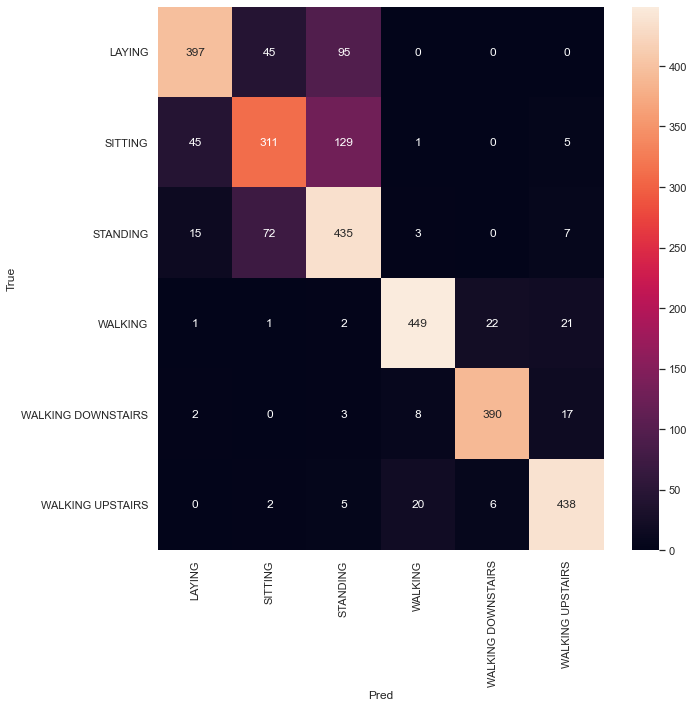

In [34]:
t_start = time.time()
model_base_mlp_u.fit(XTrainFlatten,  ytrain-1, batch_size=batch_size, validation_data=(XTestFlatten, ytest-1), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_mlp_u.evaluate(XTestFlatten,ytest-1)[1] 
print("Score With Simple MLP on Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )
metadata_mlp_u = {"time_learning" : t_learning, "score" : score}
base_mlp_u_prediction = model_base_mlp_u.predict(XTestFlatten)
y_pred_label = [ACTIVITY_DIC[x] for x in base_mlp_u_prediction.argmax(axis=1)+1]

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

### On multi-dimensional signals

#### MLP

In [35]:
print(XTrainSignals.shape)

(7352, 128, 9)


Là, on ne flatten pas les data d'entrée pour en faire des vecteurs.  Chacun des 7352 "points" du training set est une matrice des 128 pas de temps x 9 signaux bruts.

La première layer dense prend en entrée des matrices 128 x 9, et effectue des combinaisons linéaires sur la deuxième dimension (9 poids + 1 biais), puis l'activation, pour avoir en sortie des 'matrices' 128 x 1. Il y a donc (9+1) x 50 neurones = 500 paramètres à apprendre.

La layer reshape prend la sortie (128 x 1) de chacun des 50 neurones de la layer 1, pour en faire un vecteur de taille 128 x 50 = 6400.

Ce vecteur attaque la layer softmax avec ses six sorties : il y 6400 x 6 + 6 biais = 38406 paramètres à apprendre.

NB : le nombre de 'trainable parameters' est comparable au premier modèle MLP.

In [36]:
n_hidden = 50

timesteps = len(XTrainSignals[0])
input_dim = len(XTrainSignals[0][0])
n_classes = 6

model_base_mlp =km.Sequential()
model_base_mlp.add(kl.Dense(n_hidden, input_shape=(timesteps, input_dim),  activation = "relu"))
model_base_mlp.add(kl.Reshape((timesteps*n_hidden,) , input_shape= (timesteps, n_hidden)  ))
model_base_mlp.add(kl.Dense(n_classes, activation='softmax'))

model_base_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_base_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128, 50)           500       
_________________________________________________________________
reshape (Reshape)            (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 38406     
Total params: 38,906
Trainable params: 38,906
Non-trainable params: 0
_________________________________________________________________


Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 1s 182us/sample - loss: 0.5648 - accuracy: 0.7674 - val_loss: 0.6770 - val_accuracy: 0.7489
Epoch 2/10
7352/7352 [==============================] - 1s 139us/sample - loss: 0.3150 - accuracy: 0.8814 - val_loss: 0.6766 - val_accuracy: 0.7777
Epoch 3/10
7352/7352 [==============================] - 1s 126us/sample - loss: 0.2290 - accuracy: 0.9173 - val_loss: 0.5659 - val_accuracy: 0.8392
Epoch 4/10
7352/7352 [==============================] - 1s 141us/sample - loss: 0.1839 - accuracy: 0.9317 - val_loss: 0.5524 - val_accuracy: 0.8459
Epoch 5/10
7352/7352 [==============================] - 1s 135us/sample - loss: 0.1565 - accuracy: 0.9391 - val_loss: 0.5832 - val_accuracy: 0.8527
Epoch 6/10
7352/7352 [==============================] - 1s 186us/sample - loss: 0.1361 - accuracy: 0.9470 - val_loss: 0.5759 - val_accuracy: 0.8622
Epoch 7/10
7352/7352 [==============================] - 1s 141us

<AxesSubplot:xlabel='Pred', ylabel='True'>

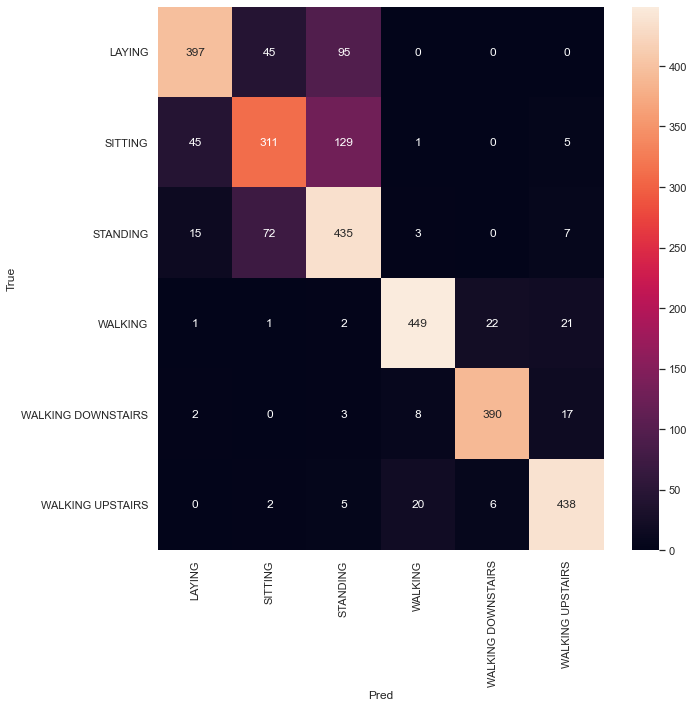

In [37]:
t_start = time.time()
model_base_mlp.fit(XTrainSignals,  ytrain-1, batch_size=batch_size, validation_data=(XTestSignals, ytest-1), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_mlp.evaluate(XTestSignals, ytest-1)[1] 
print("Score With Simple MLP on Multidimensional Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )
metadata_mlp = {"time_learning" : t_learning, "score" : score}
base_mlp_prediction = model_base_mlp.predict(XTestSignals)

y_pred_label = [ACTIVITY_DIC[x] for x in base_mlp_prediction.argmax(axis=1)+1]

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

#### 1D Convolutional neural network

Discussion sur le modèle plus bas.

Un bon article de vulgarisation sur la convolution ici : https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610  (comme la plupart du site towardsdatascience.com d'ailleurs)

Doc fonction : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

Donc : Conv1D va appliquer un nombre "filters" (ici 32) de kernels de taille "kernel_size" aux vecteurs d'entrée de dimension 128 x 9.
    
NOTA BENE : les kernels sont de dimension "kernel_size" x profondeur des vecteurs d'entrée, soit ici 9x9. Le "1D" se réfère donc au déplacement du kernel (le long de l'axe des temps), pas à sa forme ! (Je le note dans le notebook parce que j'ai ricoché sur cette notion un peu longtemps...)
    
Le vecteur 128 x 9 est donc "convolué" en un vecteur 120 x 1. Et ce pour chacun des 32 filtres : l'output shape est donc bien 120 x 32. Il faut apprendre 32 filtres de taille 9x9 + 32 biais, soit 32 x 81 + 32 = 2624 paramètres.

La layer MaxPooling1D prend en entrée des vecteurs 120 x 32, et prend le max des valeurs sur une fenêtre de taiile 3, glissante sur la première dimension. NB2 : le paramètre strides est par défaut (comme ici) égal à pool_size, donc 3 : la fenêtre de pooling se déplace de 3 en 3. Le vecteur 120 x 32 est donc réduit à un vecteur 40 x 32. Il n'y a pas de paramètres à apprendre.

Flatten et Dense_6 comme plus haut.

In [38]:
model_base_conv_1D =km.Sequential()
model_base_conv_1D.add(kl.Conv1D(32, 9, activation='relu', input_shape=(timesteps, input_dim)))
model_base_conv_1D.add(kl.MaxPooling1D(pool_size=3))
model_base_conv_1D.add(kl.Flatten())
model_base_conv_1D.add(kl.Dense(n_classes, activation='softmax'))
model_base_conv_1D.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_base_conv_1D.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 32)           2624      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 7686      
Total params: 10,310
Trainable params: 10,310
Non-trainable params: 0
_________________________________________________________________


Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 2s 260us/sample - loss: 0.5429 - accuracy: 0.7967 - val_loss: 0.4800 - val_accuracy: 0.8188
Epoch 2/10
7352/7352 [==============================] - 1s 189us/sample - loss: 0.1883 - accuracy: 0.9351 - val_loss: 0.3204 - val_accuracy: 0.8924
Epoch 3/10
7352/7352 [==============================] - 1s 180us/sample - loss: 0.1328 - accuracy: 0.9499 - val_loss: 0.3031 - val_accuracy: 0.9046
Epoch 4/10
7352/7352 [==============================] - 1s 189us/sample - loss: 0.1163 - accuracy: 0.9532 - val_loss: 0.3023 - val_accuracy: 0.9009
Epoch 5/10
7352/7352 [==============================] - 1s 192us/sample - loss: 0.1096 - accuracy: 0.9539 - val_loss: 0.3393 - val_accuracy: 0.9070
Epoch 6/10
7352/7352 [==============================] - 1s 188us/sample - loss: 0.1052 - accuracy: 0.9561 - val_loss: 0.3309 - val_accuracy: 0.9128
Epoch 7/10
7352/7352 [==============================] - 1s 190us

<AxesSubplot:xlabel='Pred', ylabel='True'>

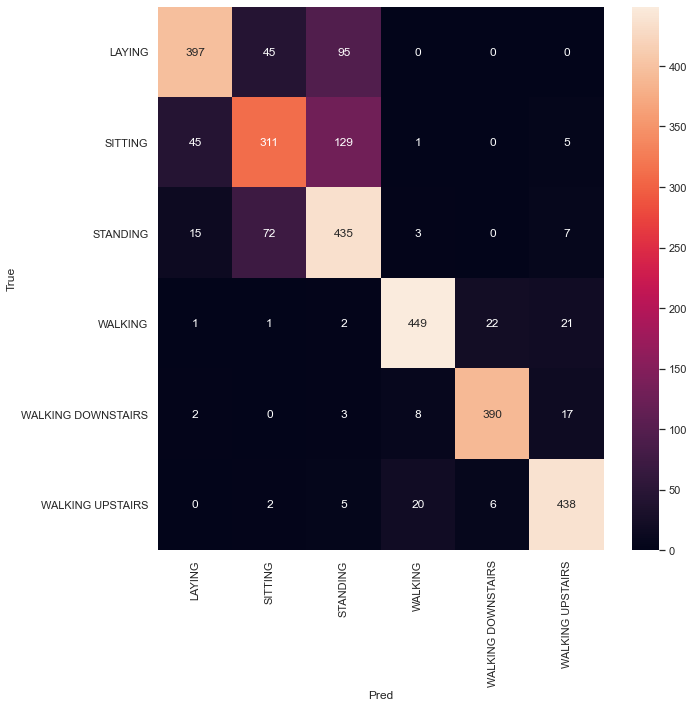

In [39]:
t_start = time.time()
model_base_conv_1D.fit(XTrainSignals,  ytrain-1, batch_size=batch_size, validation_data=(XTestSignals, ytest-1), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_conv_1D.evaluate(XTestSignals, ytest-1)[1] 
print("Score With Conv on Multidimensional Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )
metadata_conv = {"time_learning" : t_learning, "score" : score}
base_conv_1D_prediction = model_base_conv_1D.predict(XTestSignals)

y_pred_label = [ACTIVITY_DIC[x] for x in base_conv_1D_prediction.argmax(axis=1)+1]

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

####  2D Convolutional neural network

ici on a une couche en Conv2D : 
- l'entrée est spécifiée en input_shape = 128 (pas de temps) x 9 (signaux) x 1 (profondeur par défaut)
- il y a 32 filtres, de taille 3 (sur l'axe des 128) x 9 (sur l'axe des 9) x 1 (profondeur par défaut)
- NB : le filtre doit se déplacer suivant deux dimensions (puisque Conv2D), par des pas de 1 (paramètre strides = (1,1) par défaut). Mais le paramètre 'padding' est par défaut à 'valid' ce qui veut dire que le filtre ne déborde pas de la fenêtre 128 x 9. Au final le filtre 3 x 9 va donc se déplacer 126 fois d'un pas de 1 à chaque, dans la seule direction de l'axe des temps.
- la sortie est donc en output shape 126 x 1 (profondeur par défaut) x 32 (nombre filtres)
- il y a 32 filtres de taille (3 x 9) + 32 biais à apprendre, soit 32 x 27 + 32 = 896 paramètres à apprendre.

Les autres couches déjà vues.

In [40]:
model_base_conv_2D =km.Sequential()
model_base_conv_2D.add(kl.Conv2D(32, (3, 9), activation='relu', input_shape=(timesteps, input_dim, 1)))
model_base_conv_2D.add(kl.MaxPooling2D(pool_size=(2, 1)))
model_base_conv_2D.add(kl.Flatten())
model_base_conv_2D.add(kl.Dense(n_classes, activation='softmax'))
model_base_conv_2D.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_base_conv_2D.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 1, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 1, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 12102     
Total params: 12,998
Trainable params: 12,998
Non-trainable params: 0
_________________________________________________________________


In [41]:
X_train_conv = np.expand_dims(XTrainSignals, -1)
X_test_conv = np.expand_dims(XTestSignals, -1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 2s 216us/sample - loss: 0.6272 - accuracy: 0.7617 - val_loss: 0.5978 - val_accuracy: 0.7618
Epoch 2/10
7352/7352 [==============================] - 1s 165us/sample - loss: 0.2861 - accuracy: 0.9030 - val_loss: 0.4782 - val_accuracy: 0.8385
Epoch 3/10
7352/7352 [==============================] - 1s 165us/sample - loss: 0.2037 - accuracy: 0.9270 - val_loss: 0.4187 - val_accuracy: 0.8561
Epoch 4/10
7352/7352 [==============================] - 1s 163us/sample - loss: 0.1683 - accuracy: 0.9381 - val_loss: 0.3982 - val_accuracy: 0.8785
Epoch 5/10
7352/7352 [==============================] - 1s 163us/sample - loss: 0.1495 - accuracy: 0.9422 - val_loss: 0.4604 - val_accuracy: 0.8731
Epoch 6/10
7352/7352 [==============================] - 2s 204us/sample - loss: 0.1372 - accuracy: 0.9475 - val_loss: 0.3996 - val_accuracy: 0.8846
Epoch 7/10
7352/7352 [==============================] - 1s 163us

<AxesSubplot:xlabel='Pred', ylabel='True'>

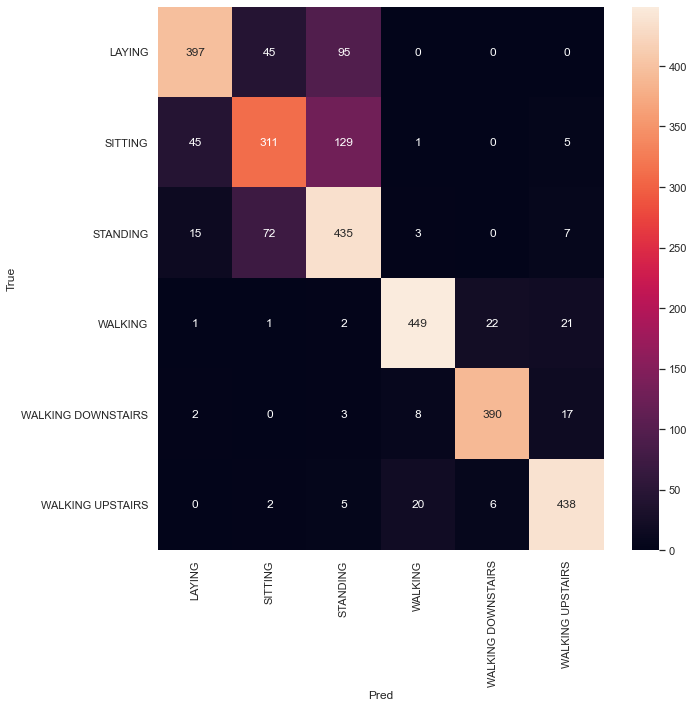

In [42]:
t_start = time.time()
model_base_conv_2D.fit(X_train_conv,  ytrain-1, batch_size=batch_size, validation_data=(X_test_conv, ytest-1), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_conv_2D.evaluate(X_test_conv, ytest-1)[1] 
print("Score With Conv on Multidimensional Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )
metadata_conv = {"time_learning" : t_learning, "score" : score}
base_conv_2D_prediction = model_base_conv_2D.predict(X_test_conv)

y_pred_label = [ACTIVITY_DIC[x] for x in base_conv_1D_prediction.argmax(axis=1)+1]

print("Score : %f, time running : %d secondes" %(score, te-ts))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sb.heatmap(pd.crosstab(np.array(ytest_label), ypred_label, rownames=['True'], colnames=['Pred']), annot=True, fmt="d")

**Q. ** Compare all the results and conclude.

Quelques conclusions à ce stade :

1- le modèle de Logistic Regression sur le data set features est indéboulonnable à 96% d'accuracy ; mais n'est pas implémentable sur smartphone.

2- les modèles sur les raw data sont à 57% (LR raw), 64% (LR raw+wavelets), 82% (LR raw+FFT). Dans la plupart des cas, les séparations sont moyennes voire médiocres. Les décompositions en ondelettes ou plus classiquement en FFT sont insuffisantes, et ne permettent pas de se débarasser du bruit.

3- les réseaux de neurones classiques (séquentiels sans convolution) amènent à 84% et 86% respectivement.

4- l'introduction de la convolution (dans les deux cas, unidimensionnelle selon l'axe des temps, même pour Conv2D) permet de capturer des patterns complexes en temps (et mieux que ondelettes et FFT), puisque l'accuracy est de 91% et 90% pour les deux modèles.

5- on note aussi que les deux CNN ont une taille trois à quatre fois moindre que les réseaux séquentiels simples, pour cinq points de mieux en accuracy.